## ViTaL: An Advanced Framework for Automated Plant Disease Identification in Leaf Images Using Vision Trans-formers and Linear Projection For Feature Reduction

Authored By : Abhishek Sebastian [0000-0002-3421-1450], Annis Fathima A[0000-0002-8769- 4222], Pragna R [0000-0003-0827-5896], Madhan Kumar S [0009-0001-7005-4130], Yaswanth Kannan G  and Vinay M


Abstract. Our paper introduces a robust framework for the automated iden-tification of diseases in plant leaf images. The framework incorporates sev-eral key stages to enhance disease recognition accuracy. In the pre-processing phase, a thumbnail resizing technique is employed to resize im-ages, minimizing the loss of critical image details while ensuring computa-tional efficiency. Normalization procedures are applied to standardize im-age data before feature extraction. Feature extraction is facilitated through a novel framework built upon Vision Transformers, a state-of-the-art ap-proach in image analysis. Additionally, alternative versions of the frame-work with an added layer of linear projection and blockwise linear projec-tions are explored. This comparative analysis allows for the evaluation of the impact of linear projection on feature extraction and overall model per-formance. To assess the effectiveness of the proposed framework, various Convolutional Neural Network (CNN) architectures are utilized, enabling a comprehensive evaluation of linear projection's influence on key evalua-tion metrics. The findings demonstrate the efficacy of the proposed frame-work, with the top-performing model achieving a Hamming loss of 0.054. Furthermore, we propose a novel hardware design specifically tailored for scanning diseased leaves in an omnidirectional fashion. The hardware im-plementation utilizes a Raspberry Pi Compute Module to address low-memory configurations, ensuring practicality and affordability. This inno-vative hardware solution enhances the overall feasibility and accessibility of the proposed automated disease identification system. This research con-tributes to the field of agriculture by offering valuable insights and tools for the early detection and management of plant diseases, potentially leading to improved crop yields and enhanced food security.

 ## **A Vision Transformer (ViT) feature extractor is like an intelligent grid system for images. Imagine you have a picture, and you want to understand what's in it.**

 Here's how it works in simple terms:

>>Cut the Picture: ViT first cuts the picture into small pieces, like dividing a puzzle into squares. Each piece is called a "patch." These patches cover the entire image.

>>Look at the Pieces: For each patch, ViT tries to understand what's in it. It assigns each patch a special number (like a code) to represent what's inside.

>>Remember Where They Are: ViT also remembers where each patch is located in the picture. It does this so it knows the patches' positions relative to each other.

>>Talk Among Themselves: Now, the patches "talk" to each other. They share information about what they see and where they are. This talking helps the model understand how patches relate to each other in the image.

>>Combine the Knowledge: After the talking, ViT combines all this information. It takes what it learned from the patches and uses it to create a summary of the entire image. This summary is like a fingerprint of the picture.

>>Useful Features: You can use this fingerprint (the features) for different tasks, like recognizing objects in the image or finding patterns. It's like having a summary of the image's important parts.

>>So, ViT takes a picture, divides it into pieces, learns what's in those pieces, and then puts it all together to understand the whole picture. It's a bit like solving a puzzle with a smart grid!

## 3.3	Image Pre-Processing

Enter the path to your image: /content/Apple-Cedar_Apple_Rust-266.jpg


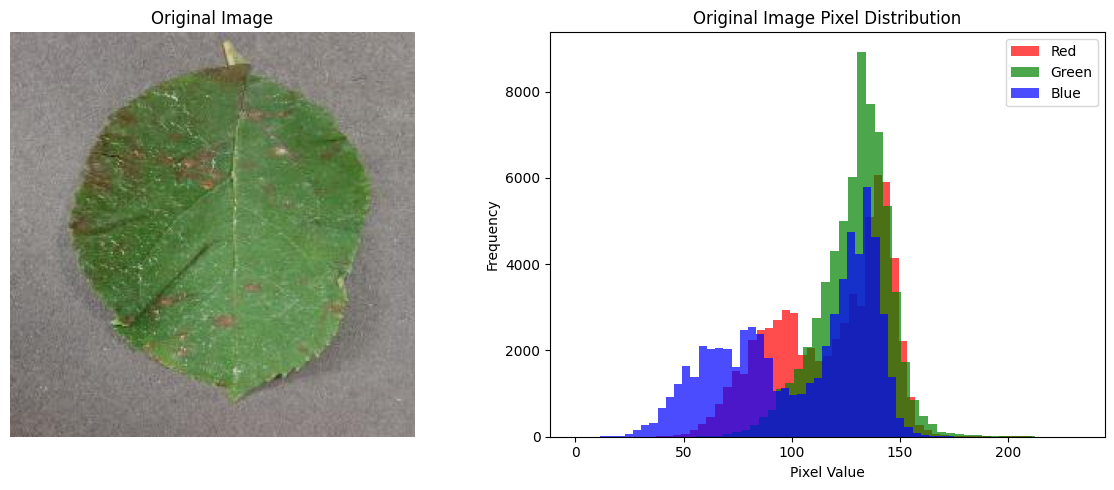

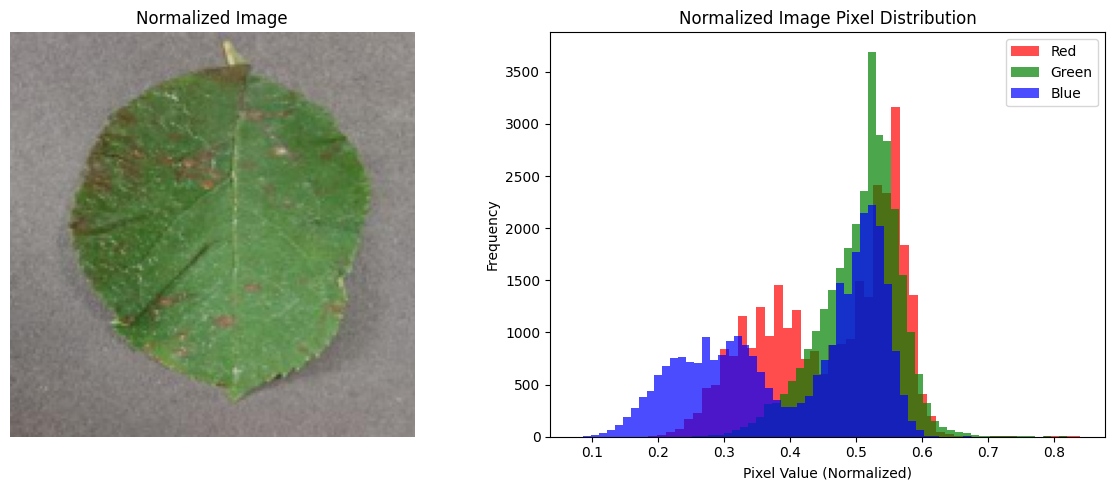

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Input the file path
image_path = input("Enter the path to your image: ")

# Open the original image
image = Image.open(image_path)

# Convert the original image to a numpy array
original_image_array = np.array(image)

# Create a 1x2 subplot: first for the image and second for the histogram
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Display the original image in the first subplot
ax[0].imshow(original_image_array)
ax[0].set_title("Original Image")
ax[0].axis("off")

# Display the pixel value distribution for the original image in the second subplot
colors = ['red', 'green', 'blue']
if len(original_image_array.shape) == 3:  # Check if image is RGB
    for i, color in enumerate(colors):
        ax[1].hist(original_image_array[..., i].ravel(), bins=50, color=color, alpha=0.7, label=color.capitalize())
else:
    ax[1].hist(original_image_array.ravel(), bins=50, color='gray', alpha=0.7, label='Gray')

ax[1].set_title('Original Image Pixel Distribution')
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Frequency')
ax[1].legend()

plt.tight_layout()
plt.show()

# Resize the image
image.thumbnail(image_size)

# Convert the resized image to a numpy array and normalize
image_array = np.array(image) / 255.0

# Display the normalized image (scaled back to 0-255 for visualization)
normalized_image_display = (image_array * 255).astype(np.uint8)

# Create another 1x2 subplot: first for the normalized image and second for its histogram
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Display the normalized image in the first subplot
ax[0].imshow(normalized_image_display)
ax[0].set_title("Normalized Image")
ax[0].axis("off")

# Plot the histogram for the pixel values of the normalized image in the second subplot
if len(image_array.shape) == 3:  # Check if image is RGB
    for i, color in enumerate(colors):
        ax[1].hist(image_array[..., i].ravel(), bins=50, color=color, alpha=0.7, label=color.capitalize())
else:
    ax[1].hist(image_array.ravel(), bins=50, color='gray', alpha=0.7, label='Gray')

ax[1].set_title('Normalized Image Pixel Distribution')
ax[1].set_xlabel('Pixel Value (Normalized)')
ax[1].set_ylabel('Frequency')
ax[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
from PIL import Image

# Input the file path
image_path = input("Enter the path to your image: ")

# Open the image
image = Image.open(image_path)

# Get the size of the image
width, height = image.size

print(f"Image dimensions: {width} x {height}")


Enter the path to your image: /content/Apple-Cedar_Apple_Rust-266.jpg
Image dimensions: 256 x 256


### Image Preprocessing

In [ ]:
import zipfile

def unzip_file(zip_path, extract_to="."):
    """
    Extract a zip file.

    Parameters:
    - zip_path: Path to the zip file.
    - extract_to: Directory to extract the contents to. Defaults to the current directory.

    Returns:
    None
    """

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Example usage:
unzip_file("/content/drive/MyDrive/ViT_Dataset.zip", "/content/drive/MyDrive/ViT_Dataset")


### Rename The Files

In [ ]:
import os

def add_jpg_extension(folder_path):
    """
    Add .JPG extension to all files in the specified folder.

    Parameters:
    - folder_path: Path to the folder.

    Returns:
    None
    """
    for filename in os.listdir(folder_path):
        if not filename.endswith(".JPG"):  # Skip files that already have the .JPG extension
            source = os.path.join(folder_path, filename)
            destination = os.path.join(folder_path, filename + ".JPG")
            os.rename(source, destination)
            print(f'Renamed: {filename} -> {filename + ".JPG"}')

# Example usage:
add_jpg_extension("/content/drive/MyDrive/ViT_Dataset/ViT_Dataset")


Renamed: Corn_(maize)-healthy-203..jpg -> Corn_(maize)-healthy-203..jpg.JPG
Renamed: Corn_(maize)-healthy-254..jpg -> Corn_(maize)-healthy-254..jpg.JPG
Renamed: Corn_(maize)-healthy-192..jpg -> Corn_(maize)-healthy-192..jpg.JPG
Renamed: Corn_(maize)-healthy-242..jpg -> Corn_(maize)-healthy-242..jpg.JPG
Renamed: Corn_(maize)-healthy-184..jpg -> Corn_(maize)-healthy-184..jpg.JPG
Renamed: Corn_(maize)-healthy-215..jpg -> Corn_(maize)-healthy-215..jpg.JPG
Renamed: Corn_(maize)-healthy-281..jpg -> Corn_(maize)-healthy-281..jpg.JPG
Renamed: Corn_(maize)-healthy-2..jpg -> Corn_(maize)-healthy-2..jpg.JPG
Renamed: Corn_(maize)-healthy-71..jpg -> Corn_(maize)-healthy-71..jpg.JPG
Renamed: Corn_(maize)-healthy-147..jpg -> Corn_(maize)-healthy-147..jpg.JPG
Renamed: Corn_(maize)-healthy-239..jpg -> Corn_(maize)-healthy-239..jpg.JPG
Renamed: Corn_(maize)-healthy-110..jpg -> Corn_(maize)-healthy-110..jpg.JPG
Renamed: Corn_(maize)-healthy-26..jpg -> Corn_(maize)-healthy-26..jpg.JPG
Renamed: Corn_(maize

In [ ]:
import random

seed_value = 42
random.seed(seed_value)

### Main Image Processing Code

In [ ]:
import os
import numpy as np
from PIL import Image
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout  # Import Dropout layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Data Preparation and Preprocessing

# Define the folder path and image size
folder_path = '/content/drive/MyDrive/ViT_Dataset/ViT_Dataset'
image_size = (175, 175)  # Increase the image size for more details
patch_size = 16
num_layers = 6  # Increase the number of layers for more complexity
d_model = 512  # Increase the model dimension for more capacity
num_heads = 8   # Increase the number of heads for more parallelism
mlp_dim = 512   # Increase the MLP dimension for more non-linearity
dropout_rate = 0.1

# Load the images and labels
images = []
labels = []

# Iterate through the files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.JPG'):
        # Load the image
        image_path = os.path.join(folder_path, file_name)
        image = Image.open(image_path)

        # Resize the image while preserving aspect ratio
        image.thumbnail(image_size)

        # Convert the image to numpy array and normalize pixel values
        image_array = np.array(image) / 255.0

        # Add the image and label to the lists
        images.append(image_array)

        # Extract the label from the file name
        label = os.path.splitext(file_name)[0]
        labels.append(label)

# Convert the labels to the desired format
for i in range(len(labels)):
    label_parts = labels[i].split('-')
    if len(label_parts) > 2:
        labels[i] = '-'.join(label_parts[:-1])

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Perform label encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Define the number of unique classes
num_classes = len(np.unique(labels_encoded))
# Input the percentage split for training, validation, and testing
while True:
    train_percentage = 80
    val_percentage = 10
    test_percentage = 10

    total_percentage = train_percentage + val_percentage + test_percentage
    if total_percentage != 100:
        print("Total percentage should be 100. Please try again.")
    else:
        break

# Perform the dataset split with stratification
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels_encoded, test_size=test_percentage / 100, random_state=42, stratify=labels_encoded
)
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=val_percentage / (train_percentage + val_percentage), random_state=42, stratify=train_labels
)

In [ ]:
set(labels)

{'Apple-Cedar_Apple_Rust',
 'Apple-Healthy',
 'Corn_(maize)-Common_rust_',
 'Corn_(maize)-healthy',
 'Grape-Esca_(Black_Measles)',
 'Grape-healthy',
 'Peach-Bacterial_spot',
 'Peach-healthy',
 'Raspberry-healthy',
 'Tomato-Yellow_Leaf_Curl_Virus',
 'Tomato-healthy'}

### label Encoder , Download for later use

In [ ]:
import joblib

# Save the label_encoder
joblib.dump(label_encoder, '/content/drive/MyDrive/ViT-Features/label_encoder.pkl')


['/content/drive/MyDrive/ViT-Features/label_encoder.pkl']

### Check the label count once.

In [ ]:
import pandas as pd

# Create a DataFrame with the labels
labels_df = pd.DataFrame({'labels': labels})

# Find the set of unique labels
unique_labels = set(labels_df['labels'])

# Count the occurrences of each label
label_counts = labels_df['labels'].value_counts()

# Display the unique labels and their respective counts
for label in unique_labels:
    count = label_counts[label]
    print(f"Label: {label}, Count: {count}")


Label: Peach-Bacterial_spot, Count: 301
Label: Peach-healthy, Count: 301
Label: Grape-Esca_(Black_Measles), Count: 301
Label: Apple-Cedar_Apple_Rust, Count: 300
Label: Tomato-healthy, Count: 301
Label: Grape-healthy, Count: 301
Label: Apple-Healthy, Count: 300
Label: Corn_(maize)-healthy, Count: 301
Label: Raspberry-healthy, Count: 301
Label: Tomato-Yellow_Leaf_Curl_Virus, Count: 301
Label: Corn_(maize)-Common_rust_, Count: 300


### Save Labels as Numpy Files

In [ ]:
import numpy as np
import zipfile

# Save the labels as NumPy arrays
np.save('train_labels.npy', train_labels)
np.save('val_labels.npy', val_labels)
np.save('test_labels.npy', test_labels)

# Create a zip file and add the saved NumPy arrays
with zipfile.ZipFile('/content/drive/MyDrive/ViT-Features/labels.zip', 'w') as zipf:
    zipf.write('train_labels.npy')
    zipf.write('val_labels.npy')
    zipf.write('test_labels.npy')


In [ ]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

# 3. 4 ---> ViT Feature Extractor ( Without Linear Projection )

In [ ]:
image_size = (175, 175)  # Increase the image size for more details
patch_size = 16
num_layers = 6  # Increase the number of layers for more complexity
d_model = 512  # Increase the model dimension for more capacity
num_heads = 8   # Increase the number of heads for more parallelism
mlp_dim = 512   # Increase the MLP dimension for more non-linearity
dropout_rate = 0.1

In [ ]:
# ViT Feature Extractor

# Define the ViT feature extractor (with more powerful hyperparameters)
def create_powerful_vit_feature_extractor(image_size, patch_size, num_layers, d_model, num_heads, mlp_dim, dropout_rate=0.2):
    inputs = Input(shape=(image_size[0], image_size[1], 3))

    # Split the image into patches
    patch_dim = patch_size * patch_size * 3
    num_patches = (image_size[0] // patch_size) * (image_size[1] // patch_size)
    patch_proj = keras.layers.Conv2D(d_model, patch_size, strides=patch_size, activation="relu")(inputs)
    patch_flat = keras.layers.Reshape((num_patches, d_model))(patch_proj)

    # Positional embeddings
    positions = keras.layers.Embedding(input_dim=num_patches, output_dim=d_model)(tf.range(num_patches))
    embeddings = patch_flat + positions

    # Transformer encoder layers
    for _ in range(num_layers):
        # Multi-head self-attention
        attn_output = keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model, dropout=dropout_rate)(
            query=embeddings, key=embeddings, value=embeddings
        )
        # Residual connection and layer normalization
        attn_output = keras.layers.LayerNormalization(epsilon=1e-6)(embeddings + attn_output)

        # Project the multi-head attention output to mlp_dim
        ffn_output = keras.layers.Dense(mlp_dim, activation="relu")(attn_output)

        # Add a residual connection and layer normalization
        ffn_output = keras.layers.Dropout(dropout_rate)(ffn_output)
        embeddings = keras.layers.LayerNormalization(epsilon=1e-6)(attn_output + ffn_output)

    # Flatten the embeddings for feature extraction
    flattened_embeddings = keras.layers.Flatten()(embeddings)

    # Create a feature extractor model
    feature_extractor = keras.Model(inputs, flattened_embeddings, name="powerful_vit_feature_extractor")

    return feature_extractor

# Create the powerful ViT feature extractor
vit_feature_extractor = create_powerful_vit_feature_extractor(
    image_size, patch_size, num_layers, d_model, num_heads, mlp_dim, dropout_rate
)


In [ ]:
# Save the ViT feature extractor as an HDF5 file
vit_feature_extractor.save("powerful_vit_feature_extractor.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
vit_feature_extractor.summary()

Model: "powerful_vit_feature_extractor"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 175, 175, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 10, 10, 512)          393728    ['input_1[0][0]']             
                                                                                                  
 reshape (Reshape)           (None, 100, 512)             0         ['conv2d[0][0]']              
                                                                                                  
 tf.__operators__.add (TFOp  (None, 100, 512)             0         ['reshape[0][0]']             
 Lambda)                                                             

In [ ]:
from tensorflow.keras.utils import plot_model

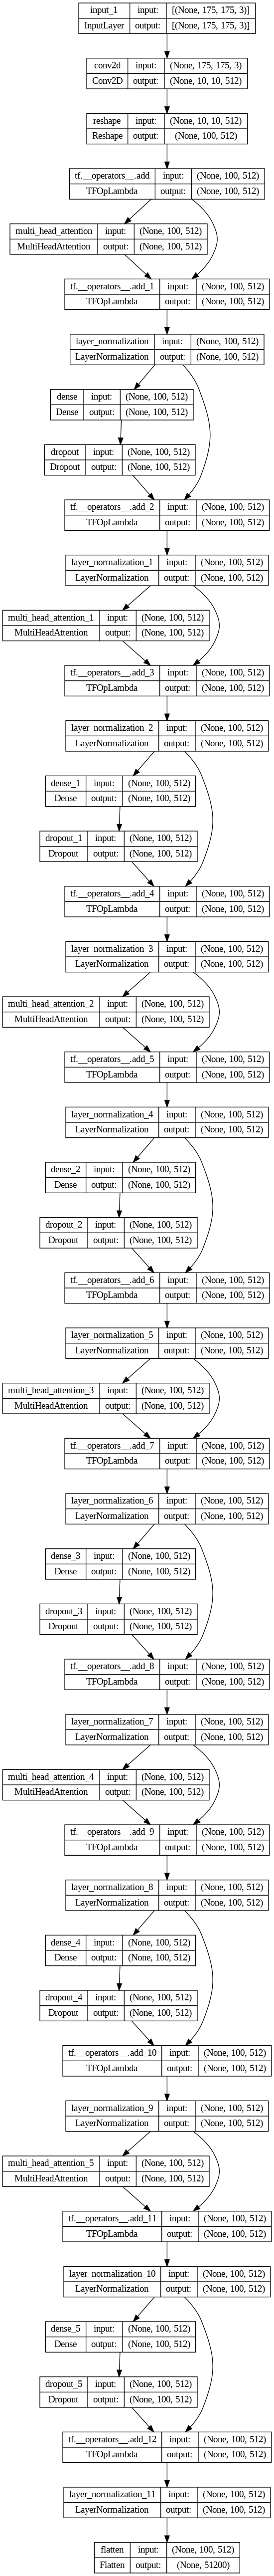

In [ ]:
# Plot the model architecture
plot_model(vit_feature_extractor, to_file='vit_feature_extractor.png', show_shapes=True)

In [ ]:
# Extract features from the images using the feature extractor
train_features = vit_feature_extractor.predict(train_images)
val_features = vit_feature_extractor.predict(val_images)
test_features = vit_feature_extractor.predict(test_images)

11/11 [==============================] - 1s 117ms/step


In [ ]:
import numpy as np
import zipfile

# Save the extracted features as numpy arrays
np.save('train_features.npy', train_features)
np.save('val_features.npy', val_features)
np.save('test_features.npy', test_features)

# Create a zip file and add the saved numpy arrays
with zipfile.ZipFile('/content/drive/MyDrive/ViT-Features/extracted_features.zip', 'w') as zipf:
    zipf.write('train_features.npy')
    zipf.write('val_features.npy')
    zipf.write('test_features.npy')

Reload as Neccesary


In [ ]:
import os
import numpy as np
from PIL import Image
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout  # Import Dropout layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [ ]:
import zipfile
import numpy as np
# Unzip the features
with zipfile.ZipFile('/content/drive/MyDrive/ViT-Features/extracted_features.zip', 'r') as zipf:
    zipf.extractall()  # Extract all files from the zip archive

# Load the numpy arrays
train_features = np.load('train_features.npy')
val_features = np.load('val_features.npy')
test_features = np.load('test_features.npy')


In [ ]:
import zipfile

# Unzip the labels
with zipfile.ZipFile('/content/drive/MyDrive/ViT-Features/labels.zip', 'r') as zipf:
    zipf.extractall()  # Extract all files from the zip archive

# Load the NumPy arrays
train_labels = np.load('train_labels.npy')
val_labels = np.load('val_labels.npy')
test_labels = np.load('test_labels.npy')


In [ ]:
train_features.shape

(2646, 51200)

In [ ]:
num_classes = 11

## Model - 1

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Create and compile the CNN model
cnn_model = keras.Sequential([
    keras.layers.Input(shape=train_features.shape[1]),
    keras.layers.Reshape((100, 512), input_shape=(train_features.shape[1],)),
    keras.layers.Conv1D(32, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(64, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

cnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)
# Define a ModelCheckpoint callback to save the best model
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath="best_model.h5",
    save_best_only=True,  # Save only the best model
    monitor='val_sparse_categorical_accuracy',  # Monitor validation accuracy
    mode='max',  # Maximize the monitored metric
    verbose=1  # Show progress
)

# Train the CNN model
history = cnn_model.fit(
    train_features, train_labels,
    validation_data=(val_features, val_labels),
    batch_size=32,
    epochs=50,
    verbose=2,
    callbacks=[keras.callbacks.EarlyStopping(patience=25, restore_best_weights=True, verbose=1),
               model_checkpoint_callback]
)

# Evaluate the best model on the test data
test_loss, test_accuracy = cnn_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")
# Save loss details and training history in a CSV file
history_df = pd.DataFrame(history.history)
history_df.to_csv("training_history.csv", index=False)

# Save test loss and accuracy in a separate CSV file
test_metrics_df = pd.DataFrame({'Test Loss': [test_loss], 'Test Accuracy': [test_accuracy]})
test_metrics_df.to_csv("test_metrics.csv", index=False)

Epoch 1/50

Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.55891, saving model to best_model.h5
83/83 - 10s - loss: 2.1198 - sparse_categorical_accuracy: 0.2653 - val_loss: 1.5713 - val_sparse_categorical_accuracy: 0.5589 - 10s/epoch - 122ms/step
Epoch 2/50

Epoch 2: val_sparse_categorical_accuracy improved from 0.55891 to 0.74320, saving model to best_model.h5
83/83 - 8s - loss: 1.3942 - sparse_categorical_accuracy: 0.5166 - val_loss: 0.9265 - val_sparse_categorical_accuracy: 0.7432 - 8s/epoch - 101ms/step
Epoch 3/50

Epoch 3: val_sparse_categorical_accuracy did not improve from 0.74320
83/83 - 5s - loss: 1.0225 - sparse_categorical_accuracy: 0.6512 - val_loss: 0.7636 - val_sparse_categorical_accuracy: 0.7402 - 5s/epoch - 61ms/step
Epoch 4/50

Epoch 4: val_sparse_categorical_accuracy improved from 0.74320 to 0.83384, saving model to best_model.h5
83/83 - 4s - loss: 0.8546 - sparse_categorical_accuracy: 0.7147 - val_loss: 0.5060 - val_sparse_categorical_accuracy: 0.83

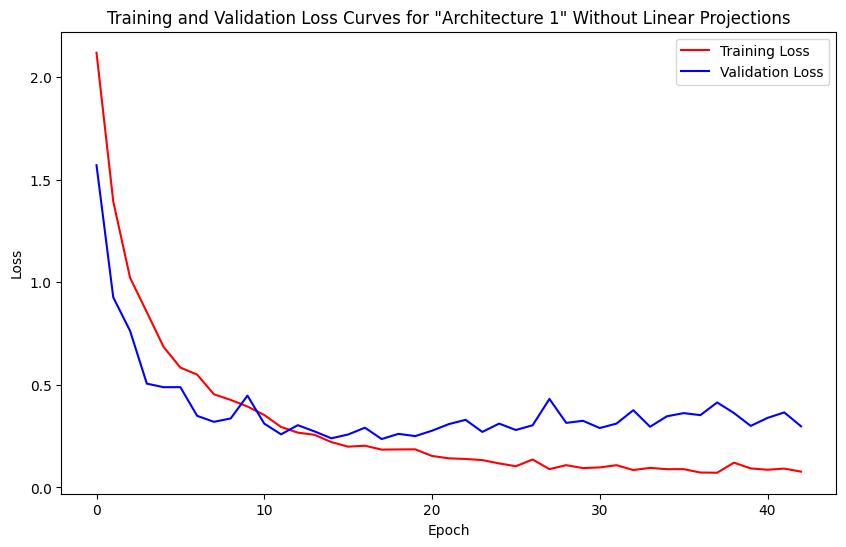

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training history from the CSV file
history_df = pd.read_csv("training_history.csv")

# Extract the loss and validation loss values
train_loss = history_df['loss']
val_loss = history_df['val_loss']

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='red')
plt.plot(val_loss, label='Validation Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves for "Architecture 1" Without Linear Projections')
plt.legend()
plt.show()


11/11 [==============================] - 0s 18ms/step - loss: 0.2448 - sparse_categorical_accuracy: 0.9366
Test accuracy: 93.66%
11/11 [==============================] - 0s 14ms/step


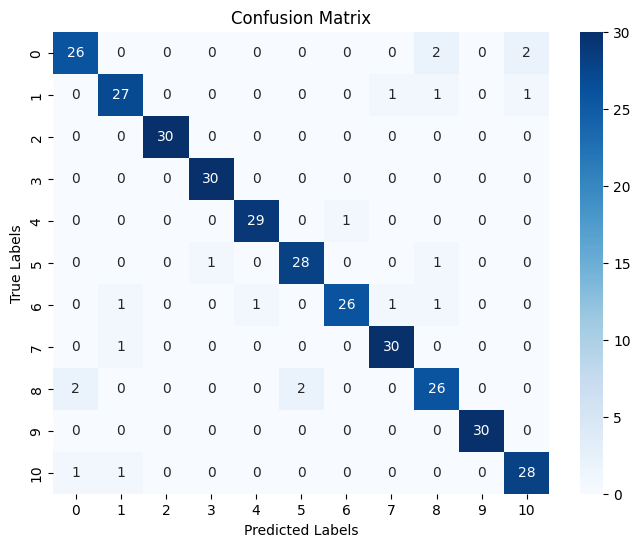

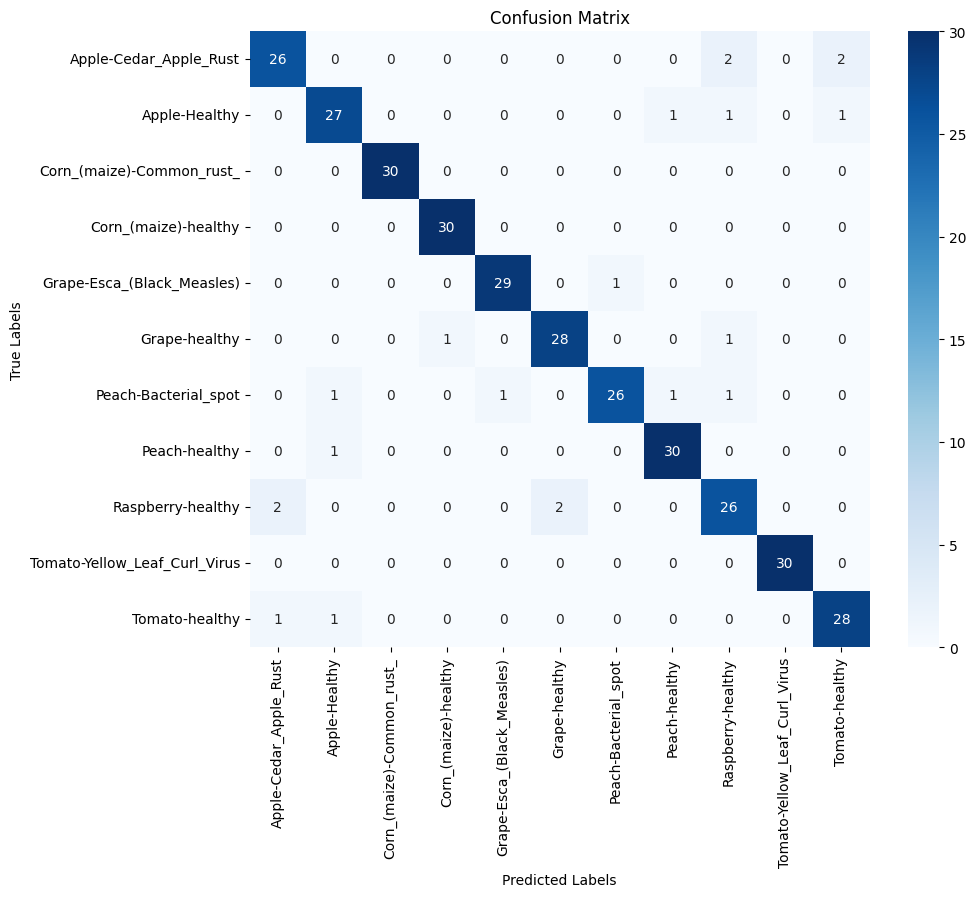

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the best model
best_model = keras.models.load_model("best_model.h5")

# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Make predictions on the test data
test_predictions = best_model.predict(test_features)
predicted_labels = np.argmax(test_predictions, axis=1)

# Create a confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

import joblib

# Load the label_encoder
loaded_label_encoder = joblib.load('/content/drive/MyDrive/ViT-Features/label_encoder.pkl')

# Get the class names from the label_encoder
class_names = loaded_label_encoder.classes_

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))  # You can adjust the figure size if needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, hamming_loss, precision_recall_fscore_support

# Calculate precision, recall, F1-score, and support for each class
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels, predicted_labels, average=None)

# Calculate micro-averaged precision, recall, F1-score
micro_precision, micro_recall, micro_f1_score, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='micro')

# Calculate macro-averaged precision, recall, F1-score
macro_precision, macro_recall, macro_f1_score, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='macro')

# Calculate Hamming loss
hamming_loss_value = hamming_loss(test_labels, predicted_labels)

# Print individual class metrics
for i, class_name in enumerate(class_names):
    print(f"Class: {class_name}")
    print(f"Precision: {precision[i]:.2f}")
    print(f"Recall: {recall[i]:.2f}")
    print(f"F1-score: {f1_score[i]:.2f}")
    print(f"Support: {support[i]}")
    print("\n")

# Print micro-averaged metrics
print("Micro-Averaged Metrics:")
print(f"Precision: {micro_precision:.2f}")
print(f"Recall: {micro_recall:.2f}")
print(f"F1-score: {micro_f1_score:.2f}")

# Print macro-averaged metrics
print("Macro-Averaged Metrics:")
print(f"Precision: {macro_precision:.2f}")
print(f"Recall: {macro_recall:.2f}")
print(f"F1-score: {macro_f1_score:.2f}")

# Print Hamming loss
print(f"Hamming Loss: {hamming_loss_value:.2f}")


Class: Apple-Cedar_Apple_Rust
Precision: 0.90
Recall: 0.87
F1-score: 0.88
Support: 30


Class: Apple-Healthy
Precision: 0.90
Recall: 0.90
F1-score: 0.90
Support: 30


Class: Corn_(maize)-Common_rust_
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Support: 30


Class: Corn_(maize)-healthy
Precision: 0.97
Recall: 1.00
F1-score: 0.98
Support: 30


Class: Grape-Esca_(Black_Measles)
Precision: 0.97
Recall: 0.97
F1-score: 0.97
Support: 30


Class: Grape-healthy
Precision: 0.93
Recall: 0.93
F1-score: 0.93
Support: 30


Class: Peach-Bacterial_spot
Precision: 0.96
Recall: 0.87
F1-score: 0.91
Support: 30


Class: Peach-healthy
Precision: 0.94
Recall: 0.97
F1-score: 0.95
Support: 31


Class: Raspberry-healthy
Precision: 0.84
Recall: 0.87
F1-score: 0.85
Support: 30


Class: Tomato-Yellow_Leaf_Curl_Virus
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Support: 30


Class: Tomato-healthy
Precision: 0.90
Recall: 0.93
F1-score: 0.92
Support: 30


Micro-Averaged Metrics:
Precision: 0.94
Recall: 0.94
F1-score:

## Model 2

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split


# Set random seed for reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Create and compile the CNN model
cnn_model_2 = keras.Sequential([
    keras.layers.Input(shape=train_features.shape[1]),
    keras.layers.Reshape((100, 512), input_shape=(train_features.shape[1],)),
    keras.layers.Conv1D(64, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(num_classes, activation='softmax')
])

cnn_model_2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)



# Create a directory to save models
os.makedirs("saved_models", exist_ok=True)

# Define a ModelCheckpoint callback to save models at the end of each epoch
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath="saved_models/model_{epoch:02d}.h5",
    save_best_only=False,  # Save models at the end of each epoch
    save_weights_only=False,  # Save the entire model
    monitor='val_sparse_categorical_accuracy',
    mode='max',
    verbose=1
)

# Train the CNN model
history_2 = cnn_model_2.fit(
    train_features, train_labels,
    validation_data=(val_features, val_labels),
    batch_size=32,
    epochs=50,
    verbose=2,
    callbacks=[keras.callbacks.EarlyStopping(patience=25, restore_best_weights=True, verbose=1),
               model_checkpoint_callback]
)

# Load the best model
best_model = keras.models.load_model("best_model.h5")

# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save loss details and training history in a CSV file
history_df = pd.DataFrame(history.history)
history_df.to_csv("training_history_2.csv", index=False)

# Save test loss and accuracy in a separate CSV file
test_metrics_df = pd.DataFrame({'Test Loss': [test_loss], 'Test Accuracy': [test_accuracy]})
test_metrics_df.to_csv("test_metrics_2.csv", index=False)


KeyboardInterrupt



11/11 [==============================] - 1s 60ms/step - loss: 0.2313 - sparse_categorical_accuracy: 0.9456
Test accuracy: 94.56%
11/11 [==============================] - 1s 50ms/step


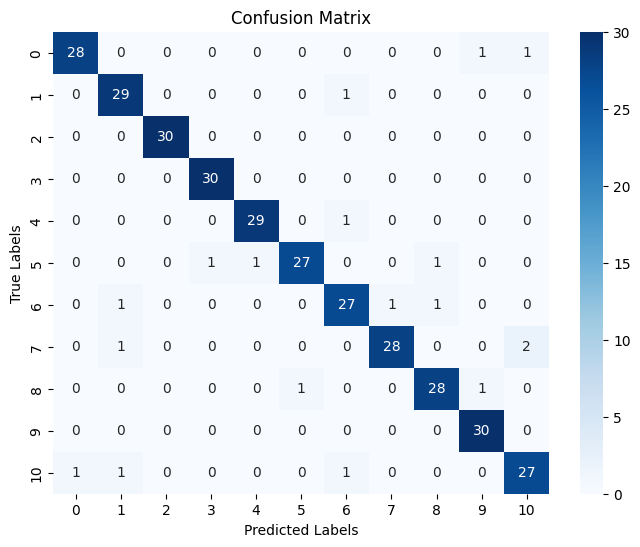

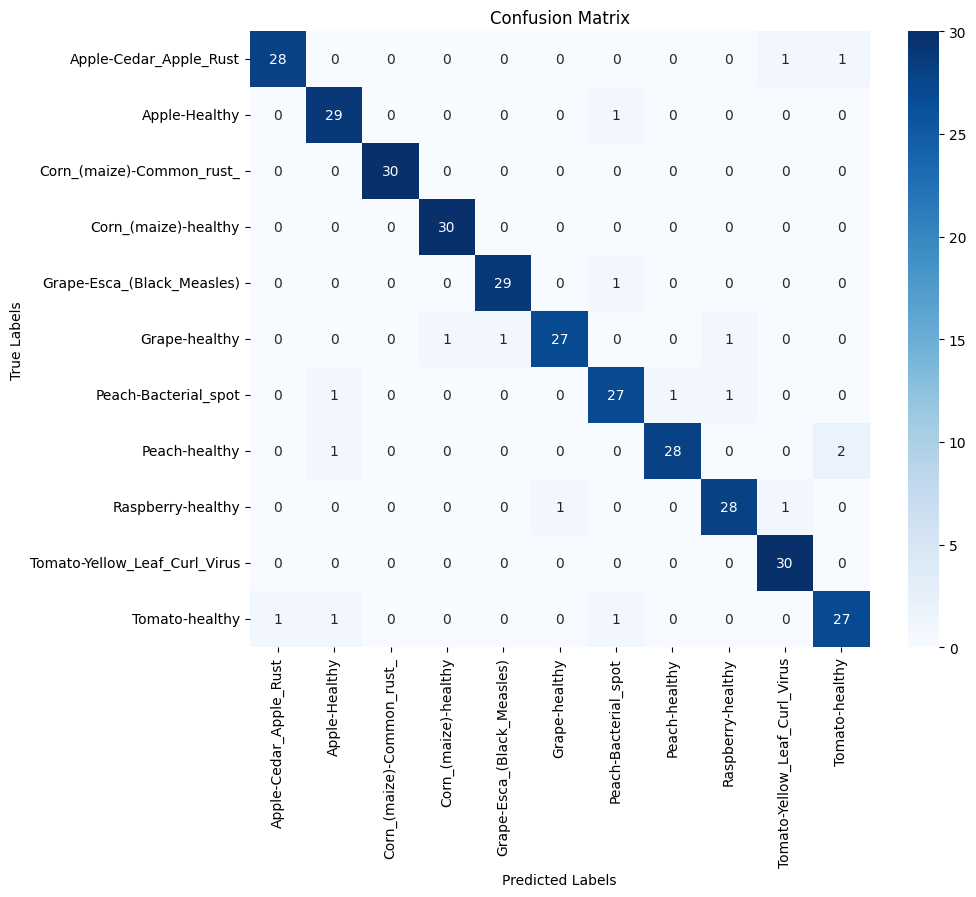

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the best model
best_model = keras.models.load_model("/content/saved_models/model_19.h5")

# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Make predictions on the test data
test_predictions = best_model.predict(test_features)
predicted_labels = np.argmax(test_predictions, axis=1)

# Create a confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

import joblib

# Load the label_encoder
loaded_label_encoder = joblib.load('/content/drive/MyDrive/ViT-Features/label_encoder.pkl')

# Get the class names from the label_encoder
class_names = loaded_label_encoder.classes_

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))  # You can adjust the figure size if needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


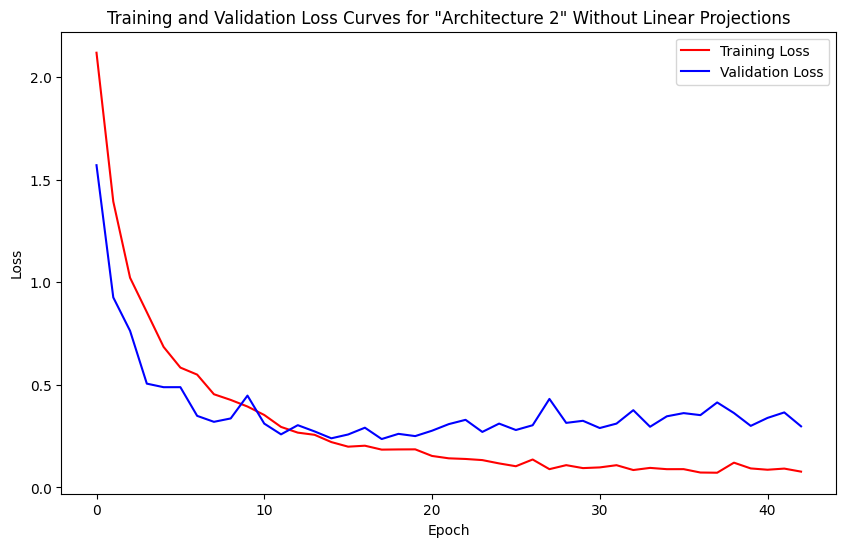

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training history from the CSV file
history_df = pd.read_csv("/content/training_history_2.csv")

# Extract the loss and validation loss values
train_loss = history_df['loss']
val_loss = history_df['val_loss']

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='red')
plt.plot(val_loss, label='Validation Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves for "Architecture 2" Without Linear Projections')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, hamming_loss, precision_recall_fscore_support

# Calculate precision, recall, F1-score, and support for each class
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels, predicted_labels, average=None)

# Calculate micro-averaged precision, recall, F1-score
micro_precision, micro_recall, micro_f1_score, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='micro')

# Calculate macro-averaged precision, recall, F1-score
macro_precision, macro_recall, macro_f1_score, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='macro')

# Calculate Hamming loss
hamming_loss_value = hamming_loss(test_labels, predicted_labels)

# Print individual class metrics
for i, class_name in enumerate(class_names):
    print(f"Class: {class_name}")
    print(f"Precision: {precision[i]:.3f}")
    print(f"Recall: {recall[i]:.3f}")
    print(f"F1-score: {f1_score[i]:.3f}")
    print(f"Support: {support[i]}")
    print("\n")

# Print micro-averaged metrics
print("Micro-Averaged Metrics:")
print(f"Precision: {micro_precision:.2f}")
print(f"Recall: {micro_recall:.2f}")
print(f"F1-score: {micro_f1_score:.2f}")

# Print macro-averaged metrics
print("Macro-Averaged Metrics:")
print(f"Precision: {macro_precision:.3f}")
print(f"Recall: {macro_recall:.3f}")
print(f"F1-score: {macro_f1_score:.3f}")

# Print Hamming loss
print(f"Hamming Loss: {hamming_loss_value:.3f}")


Class: Apple-Cedar_Apple_Rust
Precision: 0.966
Recall: 0.933
F1-score: 0.949
Support: 30


Class: Apple-Healthy
Precision: 0.906
Recall: 0.967
F1-score: 0.935
Support: 30


Class: Corn_(maize)-Common_rust_
Precision: 1.000
Recall: 1.000
F1-score: 1.000
Support: 30


Class: Corn_(maize)-healthy
Precision: 0.968
Recall: 1.000
F1-score: 0.984
Support: 30


Class: Grape-Esca_(Black_Measles)
Precision: 0.967
Recall: 0.967
F1-score: 0.967
Support: 30


Class: Grape-healthy
Precision: 0.964
Recall: 0.900
F1-score: 0.931
Support: 30


Class: Peach-Bacterial_spot
Precision: 0.900
Recall: 0.900
F1-score: 0.900
Support: 30


Class: Peach-healthy
Precision: 0.966
Recall: 0.903
F1-score: 0.933
Support: 31


Class: Raspberry-healthy
Precision: 0.933
Recall: 0.933
F1-score: 0.933
Support: 30


Class: Tomato-Yellow_Leaf_Curl_Virus
Precision: 0.938
Recall: 1.000
F1-score: 0.968
Support: 30


Class: Tomato-healthy
Precision: 0.900
Recall: 0.900
F1-score: 0.900
Support: 30


Micro-Averaged Metrics:
Preci

# 3.5 --> ViT Feature Extractor ( With Linear projection)
Feature Reduction By 90% ( from 51200 to 5120 )

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input

def create_powerful_vit_feature_extractor_with_projection(
    image_size, patch_size, num_layers, d_model, num_heads, mlp_dim,
    dropout_rate=0.2, num_features=512
):
    inputs = Input(shape=(image_size[0], image_size[1], 3))

    # Split the image into patches
    patch_dim = patch_size * patch_size * 3
    num_patches = (image_size[0] // patch_size) * (image_size[1] // patch_size)
    patch_proj = keras.layers.Conv2D(d_model, patch_size, strides=patch_size, activation="relu")(inputs)
    patch_flat = keras.layers.Reshape((num_patches, d_model))(patch_proj)

    # Positional embeddings
    positions = keras.layers.Embedding(input_dim=num_patches, output_dim=d_model)(tf.range(num_patches))
    embeddings = patch_flat + positions

    # Transformer encoder layers
    for _ in range(num_layers):
        # Multi-head self-attention
        attn_output = keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model, dropout=dropout_rate)(
            query=embeddings, key=embeddings, value=embeddings
        )
        # Residual connection and layer normalization
        attn_output = keras.layers.LayerNormalization(epsilon=1e-6)(embeddings + attn_output)

        # Project the multi-head attention output to mlp_dim
        ffn_output = keras.layers.Dense(mlp_dim, activation="relu")(attn_output)

        # Add a residual connection and layer normalization
        ffn_output = keras.layers.Dropout(dropout_rate)(ffn_output)
        embeddings = keras.layers.LayerNormalization(epsilon=1e-6)(attn_output + ffn_output)

    # Flatten the embeddings for feature extraction
    flattened_embeddings = keras.layers.Flatten()(embeddings)

    # Linear projection to reduce features
    projected_features = keras.layers.Dense(num_features)(flattened_embeddings)

    # Create a feature extractor model
    feature_extractor = keras.Model(inputs, projected_features, name="powerful_vit_feature_extractor_with_projection")

    return feature_extractor

# Define your hyperparameters here
image_size = (175, 175)  # Increase the image size for more details
patch_size = 16
num_layers = 6  # Increase the number of layers for more complexity
d_model = 512  # Increase the model dimension for more capacity
num_heads = 8   # Increase the number of heads for more parallelism
mlp_dim = 512   # Increase the MLP dimension for more non-linearity
dropout_rate = 0.1

num_features = 5120

# Use the modified function to create the ViT feature extractor with projection
vit_feature_extractor_projected = create_powerful_vit_feature_extractor_with_projection(
    image_size, patch_size, num_layers, d_model, num_heads, mlp_dim, dropout_rate, num_features
)

# If you want to check the architecture
vit_feature_extractor_projected.summary()


Model: "powerful_vit_feature_extractor_with_projection"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 175, 175, 3)]        0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 10, 10, 512)          393728    ['input_2[0][0]']             
                                                                                                  
 reshape_1 (Reshape)         (None, 100, 512)             0         ['conv2d_1[0][0]']            
                                                                                                  
 tf.__operators__.add_13 (T  (None, 100, 512)             0         ['reshape_1[0][0]']           
 FOpLambda)                                          

In [ ]:
# Save the ViT feature extractor as an HDF5 file
vit_feature_extractor_projected.save("/content/drive/MyDrive/powerful_vit_feature_extractor_with_projection.h5")


In [ ]:
# Extract features from the images using the feature extractor
train_features = vit_feature_extractor_projected.predict(train_images)
val_features = vit_feature_extractor_projected.predict(val_images)
test_features = vit_feature_extractor_projected.predict(test_images)

11/11 [==============================] - 74s 7s/step


In [ ]:
import numpy as np
import zipfile

# Save the extracted features as numpy arrays
np.save('train_features.npy', train_features)
np.save('val_features.npy', val_features)
np.save('test_features.npy', test_features)

# Create a zip file and add the saved numpy arrays
with zipfile.ZipFile('/content/drive/MyDrive/ViT-Features/extracted_features_Reduced.zip', 'w') as zipf:
    zipf.write('train_features.npy')
    zipf.write('val_features.npy')
    zipf.write('test_features.npy')

In [ ]:
train_features.shape

(2646, 5120)

### reload as wished

In [ ]:
import os
import numpy as np
from PIL import Image
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout  # Import Dropout layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [ ]:
import zipfile
import numpy as np
# Unzip the features
with zipfile.ZipFile('/content/drive/MyDrive/ViT-Features/extracted_features_Reduced.zip', 'r') as zipf:
    zipf.extractall()  # Extract all files from the zip archive

# Load the numpy arrays
train_features = np.load('train_features.npy')
val_features = np.load('val_features.npy')
test_features = np.load('test_features.npy')


In [ ]:
import zipfile

# Unzip the labels
with zipfile.ZipFile('/content/drive/MyDrive/ViT-Features/labels.zip', 'r') as zipf:
    zipf.extractall()  # Extract all files from the zip archive

# Load the NumPy arrays
train_labels = np.load('train_labels.npy')
val_labels = np.load('val_labels.npy')
test_labels = np.load('test_labels.npy')


In [ ]:
train_features.shape

(2646, 5120)

##Model 1


In [ ]:
num_classes=11

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import os  # Don't forget to import the 'os' module

# Set random seed for reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Create and compile the CNN model
cnn_model = keras.Sequential([
    keras.layers.Input(shape=train_features.shape[1]),
    keras.layers.Reshape((10, 512), input_shape=(train_features.shape[1],)),
    keras.layers.Conv1D(32, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(64, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

cnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)

# Create a directory to save models
os.makedirs("saved_models", exist_ok=True)

# Define a ModelCheckpoint callback to save models at the end of each epoch
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath="saved_models/model_{epoch:02d}.h5",
    save_best_only=False,  # Save models at the end of each epoch
    save_weights_only=False,  # Save the entire model
    monitor='val_sparse_categorical_accuracy',
    mode='max',
    verbose=1
)

# Train the CNN model
history = cnn_model.fit(
    train_features, train_labels,
    validation_data=(val_features, val_labels),
    batch_size=32,
    epochs=50,
    verbose=2,
    callbacks=[keras.callbacks.EarlyStopping(patience=25, restore_best_weights=True, verbose=1),
               model_checkpoint_callback]
)

# Evaluate the best model on the test data
test_loss, test_accuracy = cnn_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save loss details and training history in a CSV file
history_df = pd.DataFrame(history.history)
history_df.to_csv("training_history_3.csv", index=False)

# Save test loss and accuracy in a separate CSV file
test_metrics_df = pd.DataFrame({'Test Loss': [test_loss], 'Test Accuracy': [test_accuracy]})
test_metrics_df.to_csv("test_metrics_3.csv", index=False)


Epoch 1/50

Epoch 1: saving model to saved_models/model_01.h5
83/83 - 3s - loss: 2.1911 - sparse_categorical_accuracy: 0.2264 - val_loss: 1.6562 - val_sparse_categorical_accuracy: 0.4411 - 3s/epoch - 42ms/step
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to saved_models/model_02.h5
83/83 - 1s - loss: 1.5208 - sparse_categorical_accuracy: 0.4554 - val_loss: 1.0573 - val_sparse_categorical_accuracy: 0.6677 - 778ms/epoch - 9ms/step
Epoch 3/50

Epoch 3: saving model to saved_models/model_03.h5
83/83 - 1s - loss: 1.1415 - sparse_categorical_accuracy: 0.5907 - val_loss: 0.8417 - val_sparse_categorical_accuracy: 0.6556 - 558ms/epoch - 7ms/step
Epoch 4/50

Epoch 4: saving model to saved_models/model_04.h5
83/83 - 1s - loss: 0.9403 - sparse_categorical_accuracy: 0.6750 - val_loss: 0.6965 - val_sparse_categorical_accuracy: 0.7704 - 946ms/epoch - 11ms/step
Epoch 5/50

Epoch 5: saving model to saved_models/model_05.h5
83/83 - 0s - loss: 0.7836 - sparse_categorical_accuracy: 0.7256 - val_loss: 0.7481 - val_sparse_categorical_accuracy: 0.7251 - 402ms/epoch - 5ms/step
Epoch 6/50

Epoch 6: saving model to saved_models/model_06.h5
83/83 - 0s - loss: 0.6783 - sparse_categorical_accuracy: 0.7672 - val_loss: 0.5459 - val_sparse_cate

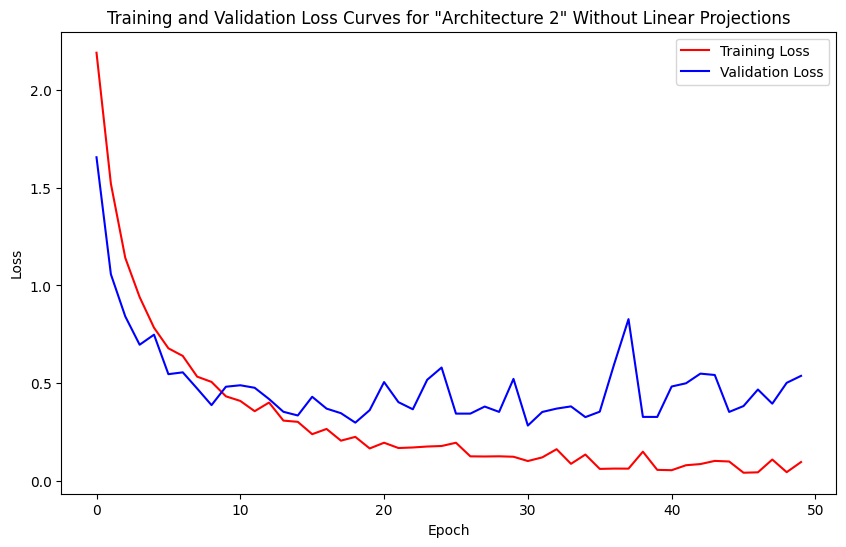

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training history from the CSV file
history_df = pd.read_csv("/content/training_history_3.csv")

# Extract the loss and validation loss values
train_loss = history_df['loss']
val_loss = history_df['val_loss']

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='red')
plt.plot(val_loss, label='Validation Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves for "Architecture 2" Without Linear Projections')
plt.legend()
plt.show()


In [ ]:
import os

# Directory where the saved models are located
models_directory = '/content/saved_models'

# Initialize variables to keep track of the best model and its accuracy
best_model_path = None
best_test_accuracy = 0.0

# Iterate through the files in the directory
for filename in os.listdir(models_directory):
    if filename.endswith('.h5'):
        # Load the model
        model_path = os.path.join(models_directory, filename)
        model = keras.models.load_model(model_path)

        # Evaluate the model on the test data
        test_loss, test_accuracy = model.evaluate(test_features, test_labels)

        # Check if this model has a higher test accuracy than the previous best
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_model_path = model_path

# Print the path of the best model and its test accuracy
print(f"Best Model Path: {best_model_path}")
print(f"Best Test Accuracy: {best_test_accuracy * 100:.2f}%")


11/11 [==============================] - 0s 2ms/step - loss: 0.5379 - sparse_categorical_accuracy: 0.8731
Best Model Path: /content/saved_models/model_45.h5
Best Test Accuracy: 90.33%


11/11 [==============================] - 0s 5ms/step - loss: 0.3680 - sparse_categorical_accuracy: 0.9033
Test accuracy: 90.33%
11/11 [==============================] - 0s 4ms/step


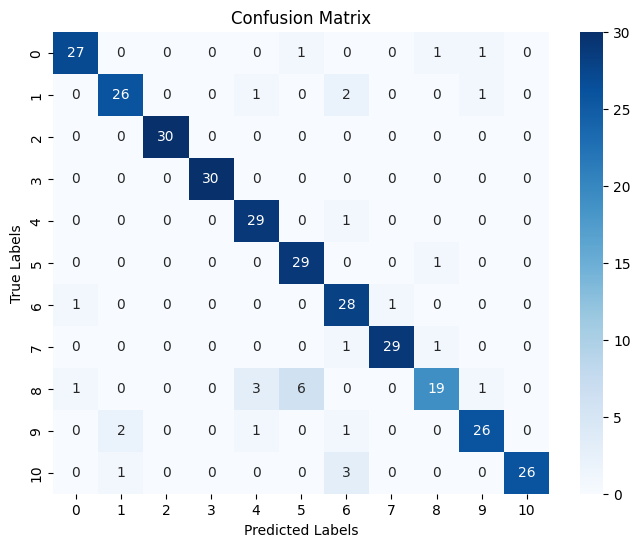

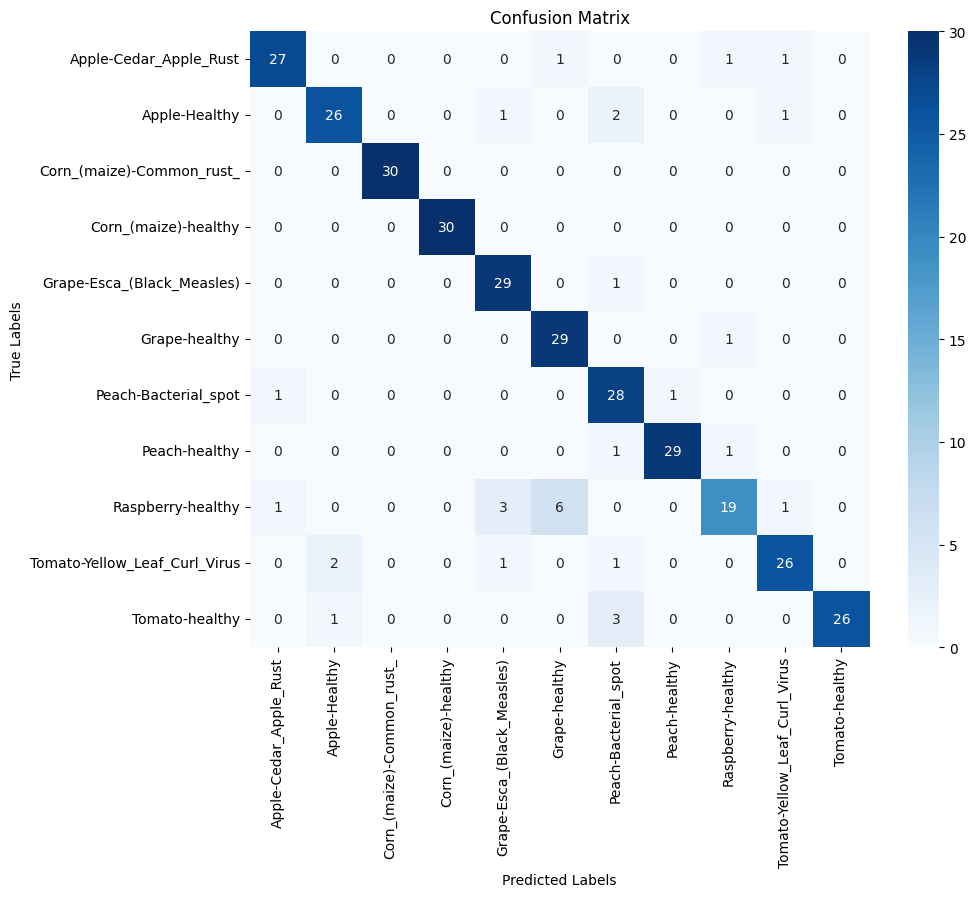

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the best model
best_model = keras.models.load_model("/content/saved_models/model_45.h5")

# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Make predictions on the test data
test_predictions = best_model.predict(test_features)
predicted_labels = np.argmax(test_predictions, axis=1)

# Create a confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

import joblib

# Load the label_encoder
loaded_label_encoder = joblib.load('/content/drive/MyDrive/ViT-Features/label_encoder.pkl')

# Get the class names from the label_encoder
class_names = loaded_label_encoder.classes_

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))  # You can adjust the figure size if needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, hamming_loss, precision_recall_fscore_support

# Calculate precision, recall, F1-score, and support for each class
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels, predicted_labels, average=None)

# Calculate micro-averaged precision, recall, F1-score
micro_precision, micro_recall, micro_f1_score, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='micro')

# Calculate macro-averaged precision, recall, F1-score
macro_precision, macro_recall, macro_f1_score, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='macro')

# Calculate Hamming loss
hamming_loss_value = hamming_loss(test_labels, predicted_labels)

# Print individual class metrics
for i, class_name in enumerate(class_names):
    print(f"Class: {class_name}")
    print(f"Precision: {precision[i]:.3f}")
    print(f"Recall: {recall[i]:.3f}")
    print(f"F1-score: {f1_score[i]:.3f}")
    print(f"Support: {support[i]}")
    print("\n")

# Print micro-averaged metrics
print("Micro-Averaged Metrics:")
print(f"Precision: {micro_precision:.2f}")
print(f"Recall: {micro_recall:.2f}")
print(f"F1-score: {micro_f1_score:.2f}")

# Print macro-averaged metrics
print("Macro-Averaged Metrics:")
print(f"Precision: {macro_precision:.3f}")
print(f"Recall: {macro_recall:.3f}")
print(f"F1-score: {macro_f1_score:.3f}")

# Print Hamming loss
print(f"Hamming Loss: {hamming_loss_value:.3f}")

Class: Apple-Cedar_Apple_Rust
Precision: 0.931
Recall: 0.900
F1-score: 0.915
Support: 30


Class: Apple-Healthy
Precision: 0.897
Recall: 0.867
F1-score: 0.881
Support: 30


Class: Corn_(maize)-Common_rust_
Precision: 1.000
Recall: 1.000
F1-score: 1.000
Support: 30


Class: Corn_(maize)-healthy
Precision: 1.000
Recall: 1.000
F1-score: 1.000
Support: 30


Class: Grape-Esca_(Black_Measles)
Precision: 0.853
Recall: 0.967
F1-score: 0.906
Support: 30


Class: Grape-healthy
Precision: 0.806
Recall: 0.967
F1-score: 0.879
Support: 30


Class: Peach-Bacterial_spot
Precision: 0.778
Recall: 0.933
F1-score: 0.848
Support: 30


Class: Peach-healthy
Precision: 0.967
Recall: 0.935
F1-score: 0.951
Support: 31


Class: Raspberry-healthy
Precision: 0.864
Recall: 0.633
F1-score: 0.731
Support: 30


Class: Tomato-Yellow_Leaf_Curl_Virus
Precision: 0.897
Recall: 0.867
F1-score: 0.881
Support: 30


Class: Tomato-healthy
Precision: 1.000
Recall: 0.867
F1-score: 0.929
Support: 30


Micro-Averaged Metrics:
Preci

##Model 2


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Create and compile the CNN model
cnn_model_2 = keras.Sequential([
    keras.layers.Input(shape=train_features.shape[1]),
    keras.layers.Reshape((10, 512), input_shape=(train_features.shape[1],)),
    keras.layers.Conv1D(64, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(num_classes, activation='softmax')
])

cnn_model_2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)


# Create a directory to save models
os.makedirs("saved_models", exist_ok=True)


# Define a ModelCheckpoint callback to save models at the end of each epoch
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath="saved_models/model_{epoch:02d}.h5",
    save_best_only=False,  # Save models at the end of each epoch
    save_weights_only=False,  # Save the entire model
    monitor='val_sparse_categorical_accuracy',
    mode='max',
    verbose=1
)

# Train the CNN model
history = cnn_model_2.fit(
    train_features, train_labels,
    validation_data=(val_features, val_labels),
    batch_size=32,
    epochs=50,
    verbose=2,
    callbacks=[keras.callbacks.EarlyStopping(patience=25, restore_best_weights=True, verbose=1),
               model_checkpoint_callback]
)
# Evaluate the best model on the test data
test_loss, test_accuracy = cnn_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save loss details and training history in a CSV file
history_df = pd.DataFrame(history.history)
history_df.to_csv("training_history_4.csv", index=False)

# Save test loss and accuracy in a separate CSV file
test_metrics_df = pd.DataFrame({'Test Loss': [test_loss], 'Test Accuracy': [test_accuracy]})
test_metrics_df.to_csv("test_metrics_4.csv", index=False)

Epoch 1/50

Epoch 1: saving model to saved_models/model_01.h5
83/83 - 2s - loss: 1.7178 - sparse_categorical_accuracy: 0.3987 - val_loss: 1.1185 - val_sparse_categorical_accuracy: 0.6163 - 2s/epoch - 18ms/step
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to saved_models/model_02.h5
83/83 - 1s - loss: 0.8378 - sparse_categorical_accuracy: 0.6984 - val_loss: 0.6070 - val_sparse_categorical_accuracy: 0.8157 - 655ms/epoch - 8ms/step
Epoch 3/50

Epoch 3: saving model to saved_models/model_03.h5
83/83 - 1s - loss: 0.6196 - sparse_categorical_accuracy: 0.7816 - val_loss: 0.7182 - val_sparse_categorical_accuracy: 0.7100 - 676ms/epoch - 8ms/step
Epoch 4/50

Epoch 4: saving model to saved_models/model_04.h5
83/83 - 1s - loss: 0.5330 - sparse_categorical_accuracy: 0.8193 - val_loss: 0.7237 - val_sparse_categorical_accuracy: 0.7432 - 656ms/epoch - 8ms/step
Epoch 5/50

Epoch 5: saving model to saved_models/model_05.h5
83/83 - 1s - loss: 0.4287 - sparse_categorical_accuracy: 0.8432 - val_loss: 0.5640 - val_sparse_categorical_accuracy: 0.7795 - 607ms/epoch - 7ms/step
Epoch 6/50

Epoch 6: saving model to saved_models/model_06.h5
83/83 - 1s - loss: 0.3896 - sparse_categorical_accuracy: 0.8624 - val_loss: 0.4594 - val_sparse_categ

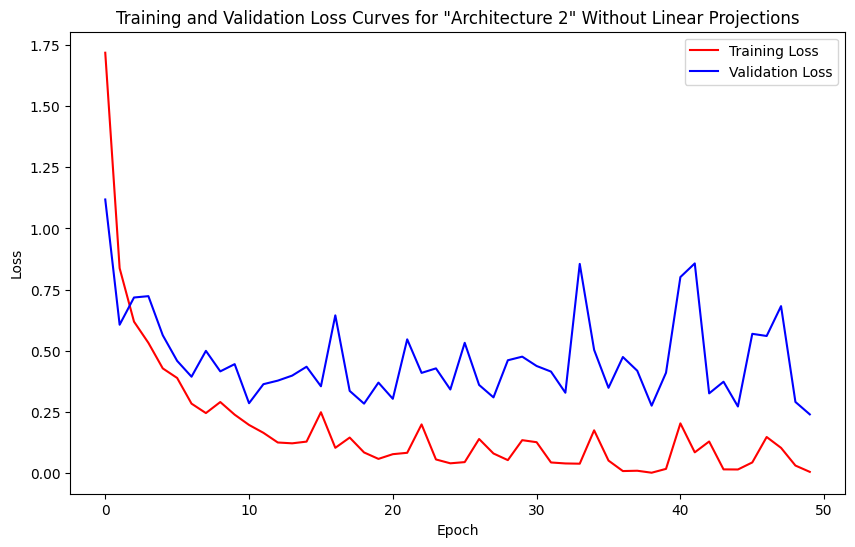

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training history from the CSV file
history_df = pd.read_csv("/content/training_history_4.csv")

# Extract the loss and validation loss values
train_loss = history_df['loss']
val_loss = history_df['val_loss']

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='red')
plt.plot(val_loss, label='Validation Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves for "Architecture 2" Without Linear Projections')
plt.legend()
plt.show()


In [ ]:
import os

# Directory where the saved models are located
models_directory = '/content/saved_models'

# Initialize variables to keep track of the best model and its accuracy
best_model_path = None
best_test_accuracy = 0.0

# Iterate through the files in the directory
for filename in os.listdir(models_directory):
    if filename.endswith('.h5'):
        # Load the model
        model_path = os.path.join(models_directory, filename)
        model = keras.models.load_model(model_path)

        # Evaluate the model on the test data
        test_loss, test_accuracy = model.evaluate(test_features, test_labels)

        # Check if this model has a higher test accuracy than the previous best
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_model_path = model_path

# Print the path of the best model and its test accuracy
print(f"Best Model Path: {best_model_path}")
print(f"Best Test Accuracy: {best_test_accuracy * 100:.2f}%")


11/11 [==============================] - 0s 3ms/step - loss: 0.6265 - sparse_categorical_accuracy: 0.8429
Best Model Path: /content/saved_models/model_39.h5
Best Test Accuracy: 92.15%


11/11 [==============================] - 0s 6ms/step - loss: 0.2867 - sparse_categorical_accuracy: 0.9215
Test accuracy: 92.15%
11/11 [==============================] - 0s 4ms/step


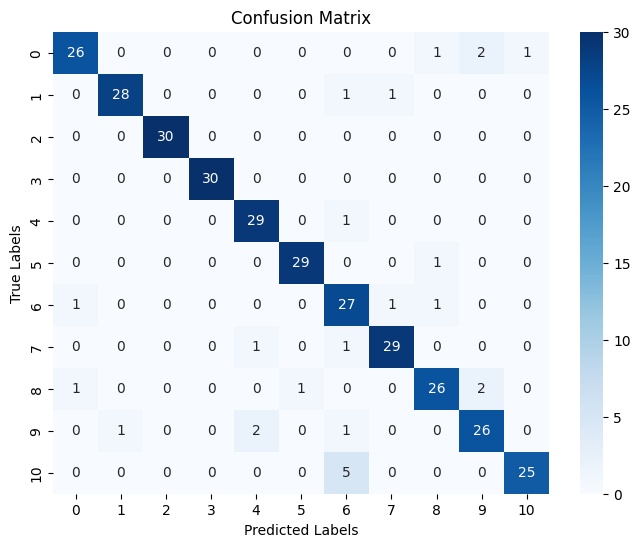

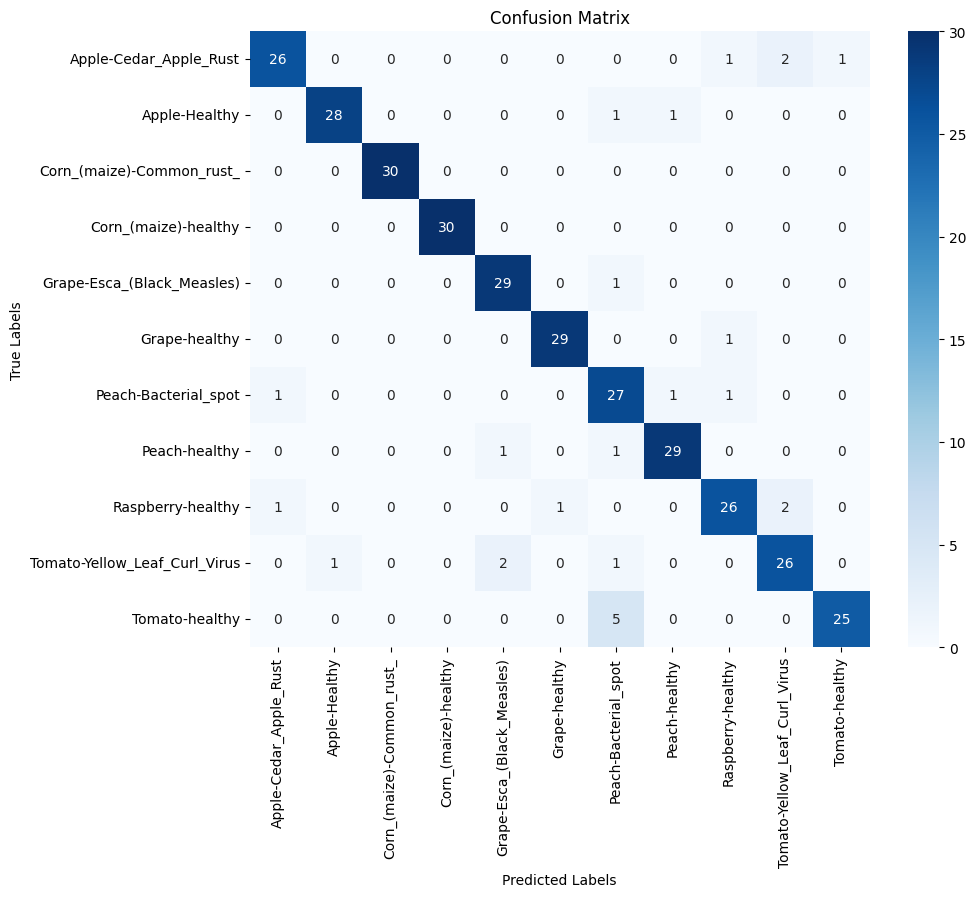

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the best model
best_model = keras.models.load_model("/content/saved_models/model_39.h5")

# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Make predictions on the test data
test_predictions = best_model.predict(test_features)
predicted_labels = np.argmax(test_predictions, axis=1)

# Create a confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

import joblib

# Load the label_encoder
loaded_label_encoder = joblib.load('/content/drive/MyDrive/ViT-Features/label_encoder.pkl')

# Get the class names from the label_encoder
class_names = loaded_label_encoder.classes_

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))  # You can adjust the figure size if needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, hamming_loss, precision_recall_fscore_support

# Calculate precision, recall, F1-score, and support for each class
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels, predicted_labels, average=None)

# Calculate micro-averaged precision, recall, F1-score
micro_precision, micro_recall, micro_f1_score, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='micro')

# Calculate macro-averaged precision, recall, F1-score
macro_precision, macro_recall, macro_f1_score, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='macro')

# Calculate Hamming loss
hamming_loss_value = hamming_loss(test_labels, predicted_labels)

# Print individual class metrics
for i, class_name in enumerate(class_names):
    print(f"Class: {class_name}")
    print(f"Precision: {precision[i]:.3f}")
    print(f"Recall: {recall[i]:.3f}")
    print(f"F1-score: {f1_score[i]:.3f}")
    print(f"Support: {support[i]}")
    print("\n")

# Print micro-averaged metrics
print("Micro-Averaged Metrics:")
print(f"Precision: {micro_precision:.2f}")
print(f"Recall: {micro_recall:.2f}")
print(f"F1-score: {micro_f1_score:.2f}")

# Print macro-averaged metrics
print("Macro-Averaged Metrics:")
print(f"Precision: {macro_precision:.3f}")
print(f"Recall: {macro_recall:.3f}")
print(f"F1-score: {macro_f1_score:.3f}")

# Print Hamming loss
print(f"Hamming Loss: {hamming_loss_value:.3f}")

Class: Apple-Cedar_Apple_Rust
Precision: 0.929
Recall: 0.867
F1-score: 0.897
Support: 30


Class: Apple-Healthy
Precision: 0.966
Recall: 0.933
F1-score: 0.949
Support: 30


Class: Corn_(maize)-Common_rust_
Precision: 1.000
Recall: 1.000
F1-score: 1.000
Support: 30


Class: Corn_(maize)-healthy
Precision: 1.000
Recall: 1.000
F1-score: 1.000
Support: 30


Class: Grape-Esca_(Black_Measles)
Precision: 0.906
Recall: 0.967
F1-score: 0.935
Support: 30


Class: Grape-healthy
Precision: 0.967
Recall: 0.967
F1-score: 0.967
Support: 30


Class: Peach-Bacterial_spot
Precision: 0.750
Recall: 0.900
F1-score: 0.818
Support: 30


Class: Peach-healthy
Precision: 0.935
Recall: 0.935
F1-score: 0.935
Support: 31


Class: Raspberry-healthy
Precision: 0.897
Recall: 0.867
F1-score: 0.881
Support: 30


Class: Tomato-Yellow_Leaf_Curl_Virus
Precision: 0.867
Recall: 0.867
F1-score: 0.867
Support: 30


Class: Tomato-healthy
Precision: 0.962
Recall: 0.833
F1-score: 0.893
Support: 30


Micro-Averaged Metrics:
Preci

# 3.6 --> ViT Feature Extractor ( Block Wise  Linear projection)

In [ ]:
import os
import numpy as np
from PIL import Image
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout  # Import Dropout layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Data Preparation and Preprocessing

# Define the folder path and image size
folder_path = '/content/drive/MyDrive/ViT_Dataset/ViT_Dataset'
image_size = (175, 175)  # Increase the image size for more details
patch_size = 16
num_layers = 6  # Increase the number of layers for more complexity
d_model = 512  # Increase the model dimension for more capacity
num_heads = 8   # Increase the number of heads for more parallelism
mlp_dim = 512   # Increase the MLP dimension for more non-linearity
dropout_rate = 0.1

# Load the images and labels
images = []
labels = []

# Iterate through the files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.JPG'):
        # Load the image
        image_path = os.path.join(folder_path, file_name)
        image = Image.open(image_path)

        # Resize the image while preserving aspect ratio
        image.thumbnail(image_size)

        # Convert the image to numpy array and normalize pixel values
        image_array = np.array(image) / 255.0

        # Add the image and label to the lists
        images.append(image_array)

        # Extract the label from the file name
        label = os.path.splitext(file_name)[0]
        labels.append(label)

# Convert the labels to the desired format
for i in range(len(labels)):
    label_parts = labels[i].split('-')
    if len(label_parts) > 2:
        labels[i] = '-'.join(label_parts[:-1])

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Perform label encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Define the number of unique classes
num_classes = len(np.unique(labels_encoded))
# Input the percentage split for training, validation, and testing
while True:
    train_percentage = 80
    val_percentage = 10
    test_percentage = 10

    total_percentage = train_percentage + val_percentage + test_percentage
    if total_percentage != 100:
        print("Total percentage should be 100. Please try again.")
    else:
        break

# Perform the dataset split with stratification
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels_encoded, test_size=test_percentage / 100, random_state=42, stratify=labels_encoded
)
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=val_percentage / (train_percentage + val_percentage), random_state=42, stratify=train_labels
)

In [ ]:
set(labels)

{'Apple-Cedar_Apple_Rust',
 'Apple-Healthy',
 'Corn_(maize)-Common_rust_',
 'Corn_(maize)-healthy',
 'Grape-Esca_(Black_Measles)',
 'Grape-healthy',
 'Peach-Bacterial_spot',
 'Peach-healthy',
 'Raspberry-healthy',
 'Tomato-Yellow_Leaf_Curl_Virus',
 'Tomato-healthy'}

In [ ]:
import joblib

# Save the label_encoder
joblib.dump(label_encoder, '/content/drive/MyDrive/ViT-Features/label_encoder.pkl')


['/content/drive/MyDrive/ViT-Features/label_encoder.pkl']

In [ ]:
import pandas as pd

# Create a DataFrame with the labels
labels_df = pd.DataFrame({'labels': labels})

# Find the set of unique labels
unique_labels = set(labels_df['labels'])

# Count the occurrences of each label
label_counts = labels_df['labels'].value_counts()

# Display the unique labels and their respective counts
for label in unique_labels:
    count = label_counts[label]
    print(f"Label: {label}, Count: {count}")


Label: Tomato-Yellow_Leaf_Curl_Virus, Count: 301
Label: Tomato-healthy, Count: 301
Label: Apple-Cedar_Apple_Rust, Count: 300
Label: Peach-Bacterial_spot, Count: 301
Label: Corn_(maize)-healthy, Count: 301
Label: Peach-healthy, Count: 301
Label: Raspberry-healthy, Count: 301
Label: Apple-Healthy, Count: 300
Label: Grape-healthy, Count: 301
Label: Grape-Esca_(Black_Measles), Count: 301
Label: Corn_(maize)-Common_rust_, Count: 300


In [ ]:
import numpy as np
import zipfile

# Save the labels as NumPy arrays
np.save('train_labels.npy', train_labels)
np.save('val_labels.npy', val_labels)
np.save('test_labels.npy', test_labels)

# Create a zip file and add the saved NumPy arrays
with zipfile.ZipFile('/content/drive/MyDrive/ViT-Features/labels.zip', 'w') as zipf:
    zipf.write('train_labels.npy')
    zipf.write('val_labels.npy')
    zipf.write('test_labels.npy')


In [ ]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [ ]:
def create_powerful_vit_feature_extractor(image_size, patch_size, num_layers, d_model, num_heads, mlp_dim, dropout_rate=0.2):
    inputs = Input(shape=(image_size[0], image_size[1], 3))

    # Split the image into patches
    patch_dim = patch_size * patch_size * 3
    num_patches = (image_size[0] // patch_size) * (image_size[1] // patch_size)
    patch_proj = keras.layers.Conv2D(d_model, patch_size, strides=patch_size, activation="relu")(inputs)
    patch_flat = keras.layers.Reshape((num_patches, d_model))(patch_proj)

    # Positional embeddings
    positions = keras.layers.Embedding(input_dim=num_patches, output_dim=d_model)(tf.range(num_patches))
    embeddings = patch_flat + positions

    # Transformer encoder layers
    for _ in range(num_layers):
        # Multi-head self-attention
        attn_output = keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model, dropout=dropout_rate)(
            query=embeddings, key=embeddings, value=embeddings
        )
        # Linear projection to reduce features
        reduced_attn_output = keras.layers.Dense(int(d_model * 0.1), activation="linear")(attn_output)
        # Project back to original dimension
        attn_output = keras.layers.Dense(d_model, activation="linear")(reduced_attn_output)
        # Residual connection and layer normalization
        attn_output = keras.layers.LayerNormalization(epsilon=1e-6)(embeddings + attn_output)

        # Project the multi-head attention output to mlp_dim
        ffn_output = keras.layers.Dense(mlp_dim, activation="relu")(attn_output)
        # Add a residual connection and layer normalization
        ffn_output = keras.layers.Dropout(dropout_rate)(ffn_output)
        # Linear projection to reduce features
        reduced_ffn_output = keras.layers.Dense(int(d_model * 0.1), activation="linear")(ffn_output)
        # Project back to original dimension
        ffn_output = keras.layers.Dense(d_model, activation="linear")(reduced_ffn_output)
        embeddings = keras.layers.LayerNormalization(epsilon=1e-6)(attn_output + ffn_output)

    # Flatten the embeddings for feature extraction
    flattened_embeddings = keras.layers.Flatten()(embeddings)

    # Create a feature extractor model
    feature_extractor = keras.Model(inputs, flattened_embeddings, name="powerful_vit_feature_extractor")

    return feature_extractor


In [ ]:
image_size = (175, 175)  # Increase the image size for more details
patch_size = 16
num_layers = 6  # Increase the number of layers for more complexity
d_model = 512  # Increase the model dimension for more capacity
num_heads = 8   # Increase the number of heads for more parallelism
mlp_dim = 512   # Increase the MLP dimension for more non-linearity
dropout_rate = 0.1

In [ ]:
def create_powerful_vit_feature_extractor(image_size, patch_size, num_layers, d_model, num_heads, mlp_dim, dropout_rate=0.2):
    inputs = Input(shape=(image_size[0], image_size[1], 3))

    # Split the image into patches
    num_patches = (image_size[0] // patch_size) * (image_size[1] // patch_size)
    patch_proj = keras.layers.Conv2D(d_model, patch_size, strides=patch_size, activation="relu")(inputs)
    patch_flat = keras.layers.Reshape((num_patches, d_model))(patch_proj)

    # Positional embeddings
    positions = keras.layers.Embedding(input_dim=num_patches, output_dim=d_model)(tf.range(num_patches))
    embeddings = patch_flat + positions

    # Track the count of effective features
    effective_feature_count = d_model

    # Transformer encoder layers
    for _ in range(num_layers):
        # Linear projection for query, key, and value vectors
        query_proj = keras.layers.Dense(d_model, activation=None, use_bias=True)(embeddings)
        key_proj = keras.layers.Dense(d_model, activation=None, use_bias=True)(embeddings)
        value_proj = keras.layers.Dense(d_model, activation=None, use_bias=True)(embeddings)

        # Multi-head self-attention
        attn_output = keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=d_model, dropout=dropout_rate
        )(query=query_proj, key=key_proj, value=value_proj)

        # Residual connection and layer normalization for attention
        attn_output = keras.layers.LayerNormalization(epsilon=1e-6)(embeddings + attn_output)

        # Project the multi-head attention output to mlp_dim
        ffn_output = keras.layers.Dense(mlp_dim, activation="relu")(attn_output)
        # Add a residual connection and layer normalization for FFN
        ffn_output = keras.layers.Dropout(dropout_rate)(ffn_output)
        embeddings = keras.layers.LayerNormalization(epsilon=1e-6)(attn_output + ffn_output)

        # Update the count of effective features
        effective_feature_count = int(effective_feature_count * 0.5)
        print(effective_feature_count)

    # Slice the embeddings to include only effective features
    final_embeddings = embeddings[:, :, :effective_feature_count]

    # Flatten the final embeddings for feature extraction
    flattened_embeddings = keras.layers.Flatten()(final_embeddings)

    # Create a feature extractor model
    feature_extractor = keras.Model(inputs, flattened_embeddings, name="powerful_vit_feature_extractor")

    return feature_extractor


In [ ]:
# Create the powerful ViT feature extractor
vit_feature_extractor = create_powerful_vit_feature_extractor(
    image_size, patch_size, num_layers, d_model, num_heads, mlp_dim, dropout_rate
)


256
128
64
32
16
8


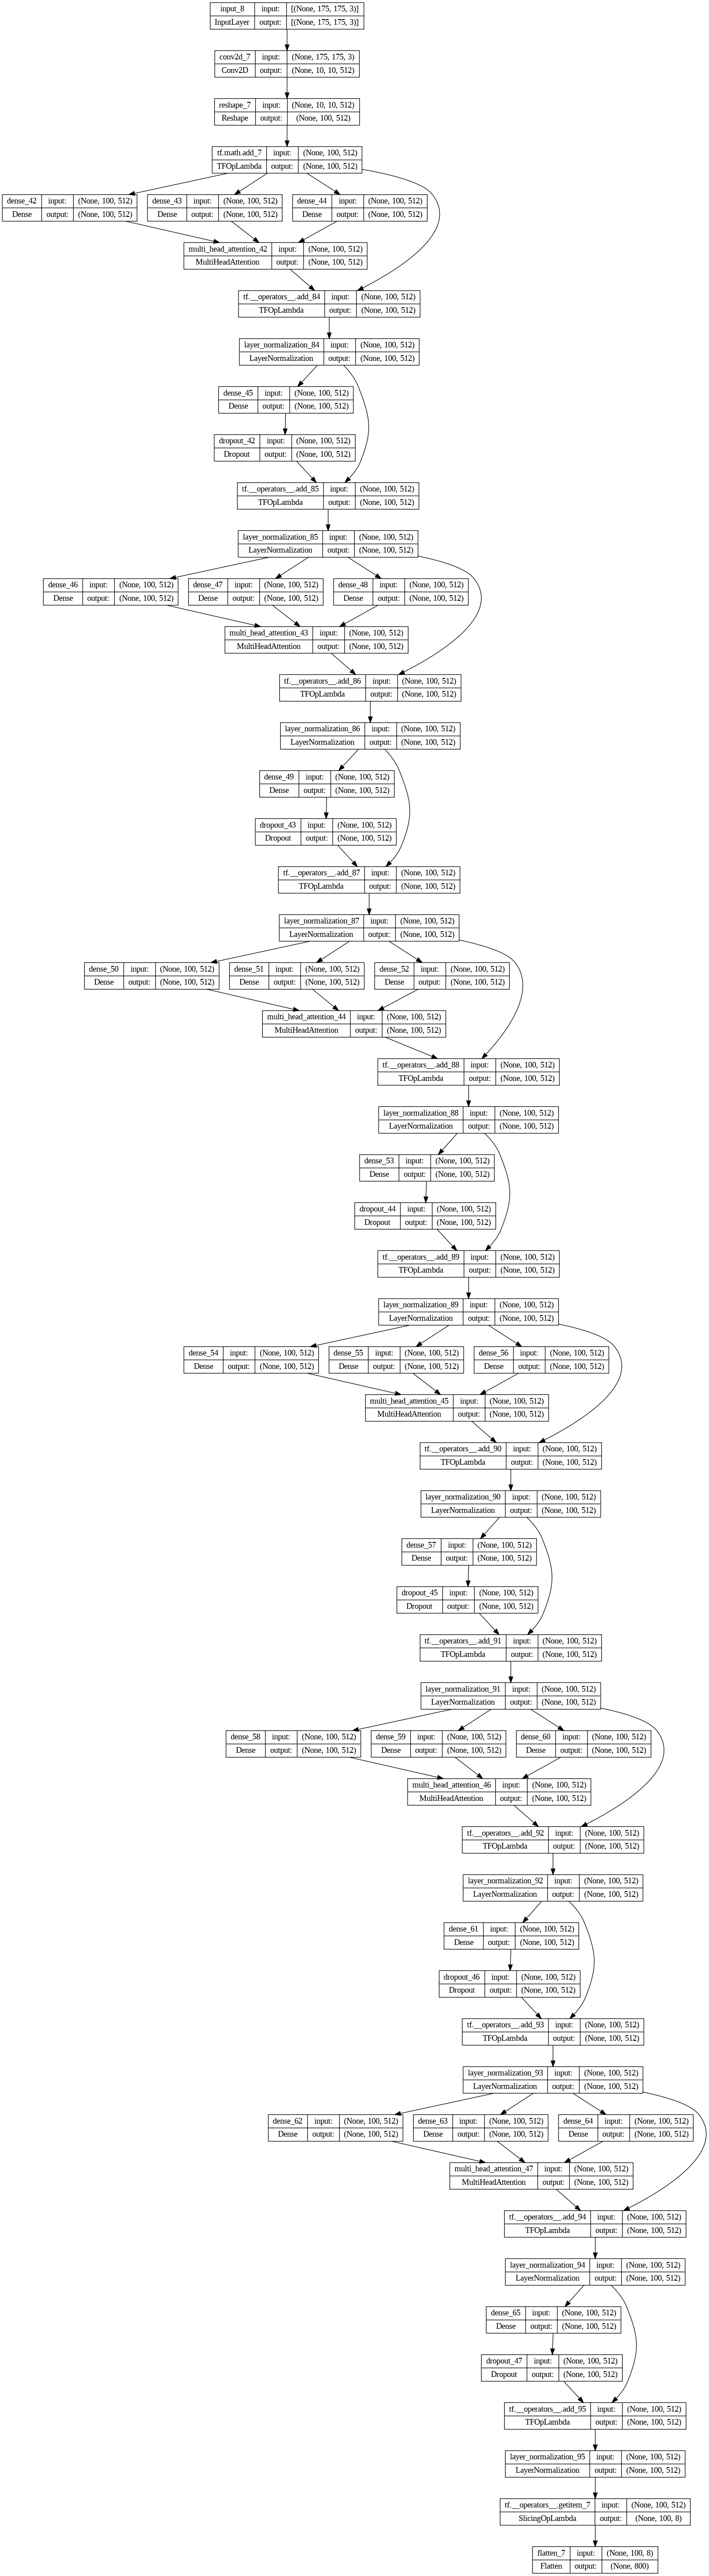

In [ ]:
plot_model(vit_feature_extractor, to_file='vit_feature_extractor.png', show_shapes=True)

In [ ]:
# Save the ViT feature extractor as an HDF5 file
vit_feature_extractor.save("powerful_vit_feature_extractor.h5")


In [ ]:
vit_feature_extractor.summary()

Model: "powerful_vit_feature_extractor"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 175, 175, 3)]        0         []                            
                                                                                                  
 conv2d_7 (Conv2D)           (None, 10, 10, 512)          393728    ['input_8[0][0]']             
                                                                                                  
 reshape_7 (Reshape)         (None, 100, 512)             0         ['conv2d_7[0][0]']            
                                                                                                  
 tf.math.add_7 (TFOpLambda)  (None, 100, 512)             0         ['reshape_7[0][0]']           
                                                                     

In [ ]:
# Save the ViT feature extractor as an HDF5 file
vit_feature_extractor.save("/content/drive/MyDrive/powerful_vit_feature_extractor_with_projection_at_each_Layer_2.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Extract features from the images using the feature extractor
train_features = vit_feature_extractor.predict(train_images)
val_features = vit_feature_extractor.predict(val_images)
test_features = vit_feature_extractor.predict(test_images)

11/11 [==============================] - 2s 139ms/step


In [ ]:
import numpy as np
import zipfile

# Save the extracted features as numpy arrays
np.save('train_features.npy', train_features)
np.save('val_features.npy', val_features)
np.save('test_features.npy', test_features)

# Create a zip file and add the saved numpy arrays
with zipfile.ZipFile('/content/drive/MyDrive/ViT-Features/extracted_features_Reduced_800_V2.zip', 'w') as zipf:
    zipf.write('train_features.npy')
    zipf.write('val_features.npy')
    zipf.write('test_features.npy')

In [ ]:
import os
import numpy as np
from PIL import Image
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout  # Import Dropout layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [ ]:
import zipfile
import numpy as np
# Unzip the features
with zipfile.ZipFile('/content/drive/MyDrive/ViT-Features/extracted_features_Reduced_800_V2.zip', 'r') as zipf:
    zipf.extractall()  # Extract all files from the zip archive

# Load the numpy arrays
train_features = np.load('train_features.npy')
val_features = np.load('val_features.npy')
test_features = np.load('test_features.npy')


In [ ]:
import zipfile

# Unzip the labels
with zipfile.ZipFile('/content/drive/MyDrive/ViT-Features/labels.zip', 'r') as zipf:
    zipf.extractall()  # Extract all files from the zip archive

# Load the NumPy arrays
train_labels = np.load('train_labels.npy')
val_labels = np.load('val_labels.npy')
test_labels = np.load('test_labels.npy')


In [ ]:
train_features.shape

(2646, 800)

In [ ]:
num_classes=11

## Model 1

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import os  # Don't forget to import the 'os' module

# Set random seed for reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Create and compile the CNN model
cnn_model = keras.Sequential([
    keras.layers.Input(shape=train_features.shape[1]),
    keras.layers.Reshape((10, 80), input_shape=(train_features.shape[1],)),
    keras.layers.Conv1D(32, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(64, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

cnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)

# Create a directory to save models
os.makedirs("saved_models", exist_ok=True)

# Define a ModelCheckpoint callback to save models at the end of each epoch
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath="saved_models/model_{epoch:02d}.h5",
    save_best_only=False,  # Save models at the end of each epoch
    save_weights_only=False,  # Save the entire model
    monitor='val_sparse_categorical_accuracy',
    mode='max',
    verbose=1
)

# Train the CNN model
history = cnn_model.fit(
    train_features, train_labels,
    validation_data=(val_features, val_labels),
    batch_size=32,
    epochs=50,
    verbose=2,
    callbacks=[keras.callbacks.EarlyStopping(patience=100, restore_best_weights=True, verbose=1),
               model_checkpoint_callback]
)

# Evaluate the best model on the test data
test_loss, test_accuracy = cnn_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save loss details and training history in a CSV file
history_df = pd.DataFrame(history.history)
history_df.to_csv("training_history_3.csv", index=False)

# Save test loss and accuracy in a separate CSV file
test_metrics_df = pd.DataFrame({'Test Loss': [test_loss], 'Test Accuracy': [test_accuracy]})
test_metrics_df.to_csv("test_metrics_3.csv", index=False)


Epoch 1/50

Epoch 1: saving model to saved_models/model_01.h5
83/83 - 8s - loss: 2.1352 - sparse_categorical_accuracy: 0.2445 - val_loss: 1.6173 - val_sparse_categorical_accuracy: 0.5801 - 8s/epoch - 100ms/step
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to saved_models/model_02.h5
83/83 - 0s - loss: 1.5384 - sparse_categorical_accuracy: 0.4584 - val_loss: 1.2319 - val_sparse_categorical_accuracy: 0.6103 - 395ms/epoch - 5ms/step
Epoch 3/50

Epoch 3: saving model to saved_models/model_03.h5
83/83 - 0s - loss: 1.2235 - sparse_categorical_accuracy: 0.5854 - val_loss: 0.9371 - val_sparse_categorical_accuracy: 0.6647 - 360ms/epoch - 4ms/step
Epoch 4/50

Epoch 4: saving model to saved_models/model_04.h5
83/83 - 0s - loss: 0.9908 - sparse_categorical_accuracy: 0.6587 - val_loss: 0.7893 - val_sparse_categorical_accuracy: 0.7432 - 420ms/epoch - 5ms/step
Epoch 5/50

Epoch 5: saving model to saved_models/model_05.h5
83/83 - 0s - loss: 0.8509 - sparse_categorical_accuracy: 0.7086 - val_loss: 0.6806 - val_sparse_categorical_accuracy: 0.7553 - 412ms/epoch - 5ms/step
Epoch 6/50

Epoch 6: saving model to saved_models/model_06.h5
83/83 - 0s - loss: 0.7848 - sparse_categorical_accuracy: 0.7309 - val_loss: 0.5952 - val_sparse_categ

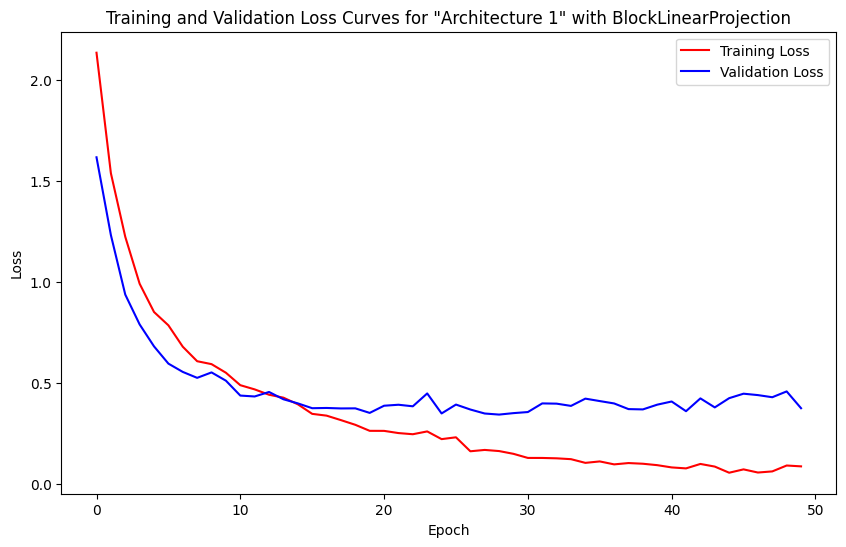

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training history from the CSV file
history_df = pd.read_csv("/content/training_history_3.csv")

# Extract the loss and validation loss values
train_loss = history_df['loss']
val_loss = history_df['val_loss']

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='red')
plt.plot(val_loss, label='Validation Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves for "Architecture 1" with BlockLinearProjection')
plt.legend()
plt.show()


In [ ]:
import os

# Directory where the saved models are located
models_directory = '/content/saved_models'

# Initialize variables to keep track of the best model and its accuracy
best_model_path = None
best_test_accuracy = 0.0

# Iterate through the files in the directory
for filename in os.listdir(models_directory):
    if filename.endswith('.h5'):
        # Load the model
        model_path = os.path.join(models_directory, filename)
        model = keras.models.load_model(model_path)

        # Evaluate the model on the test data
        test_loss, test_accuracy = model.evaluate(test_features, test_labels)

        # Check if this model has a higher test accuracy than the previous best
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_model_path = model_path

# Print the path of the best model and its test accuracy
print(f"Best Model Path: {best_model_path}")
print(f"Best Test Accuracy: {best_test_accuracy * 100:.2f}%")


11/11 [==============================] - 0s 3ms/step - loss: 0.4229 - sparse_categorical_accuracy: 0.8610
Best Model Path: /content/saved_models/model_42.h5
Best Test Accuracy: 88.82%


11/11 [==============================] - 1s 8ms/step - loss: 0.4025 - sparse_categorical_accuracy: 0.8882
Test accuracy: 88.82%
11/11 [==============================] - 1s 5ms/step


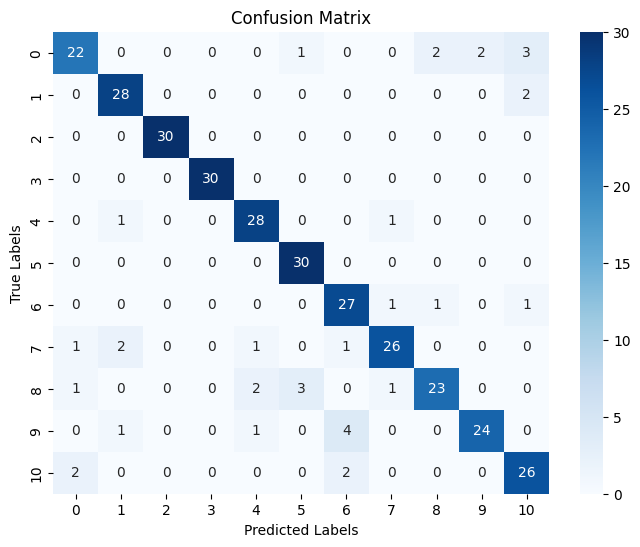

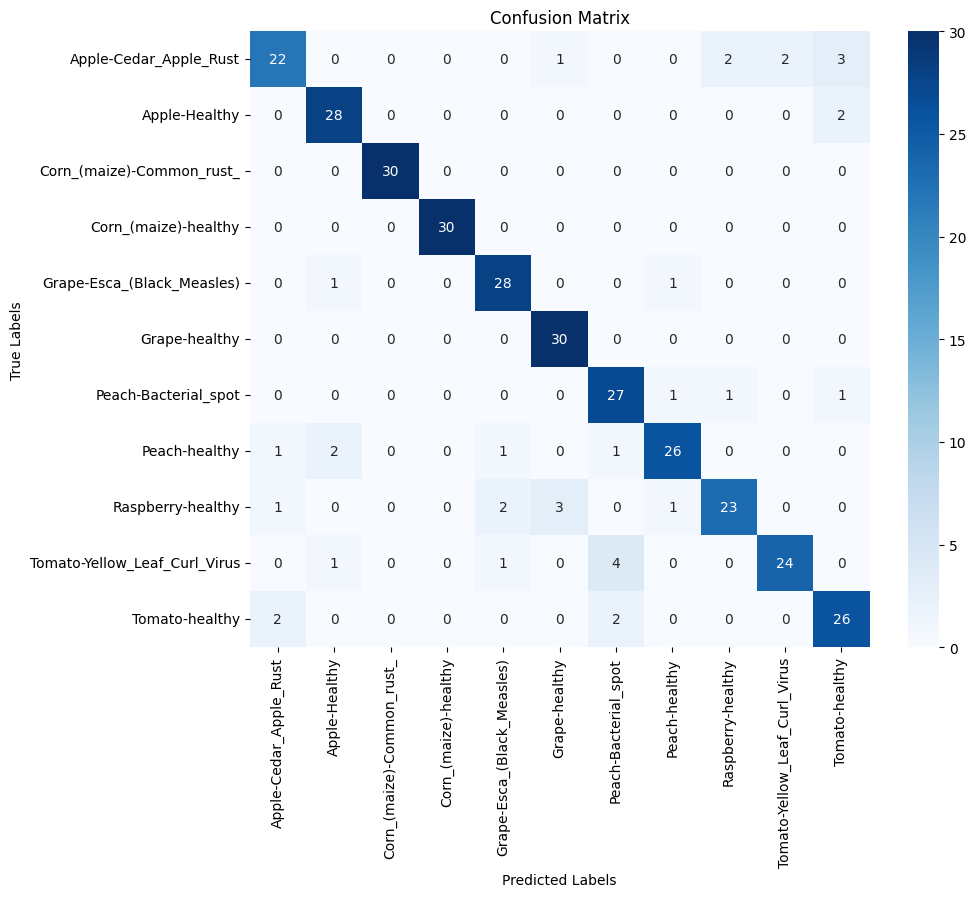

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the best model
best_model = keras.models.load_model("/content/saved_models/model_42.h5")

# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Make predictions on the test data
test_predictions = best_model.predict(test_features)
predicted_labels = np.argmax(test_predictions, axis=1)

# Create a confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

import joblib

# Load the label_encoder
loaded_label_encoder = joblib.load('/content/drive/MyDrive/ViT-Features/label_encoder.pkl')

# Get the class names from the label_encoder
class_names = loaded_label_encoder.classes_

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))  # You can adjust the figure size if needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, hamming_loss, precision_recall_fscore_support

# Calculate precision, recall, F1-score, and support for each class
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels, predicted_labels, average=None)

# Calculate micro-averaged precision, recall, F1-score
micro_precision, micro_recall, micro_f1_score, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='micro')

# Calculate macro-averaged precision, recall, F1-score
macro_precision, macro_recall, macro_f1_score, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='macro')

# Calculate Hamming loss
hamming_loss_value = hamming_loss(test_labels, predicted_labels)

# Print individual class metrics
for i, class_name in enumerate(class_names):
    print(f"Class: {class_name}")
    print(f"Precision: {precision[i]:.3f}")
    print(f"Recall: {recall[i]:.3f}")
    print(f"F1-score: {f1_score[i]:.3f}")
    print(f"Support: {support[i]}")
    print("\n")

# Print micro-averaged metrics
print("Micro-Averaged Metrics:")
print(f"Precision: {micro_precision:.2f}")
print(f"Recall: {micro_recall:.2f}")
print(f"F1-score: {micro_f1_score:.2f}")

# Print macro-averaged metrics
print("Macro-Averaged Metrics:")
print(f"Precision: {macro_precision:.3f}")
print(f"Recall: {macro_recall:.3f}")
print(f"F1-score: {macro_f1_score:.3f}")

# Print Hamming loss
print(f"Hamming Loss: {hamming_loss_value:.3f}")

Class: Apple-Cedar_Apple_Rust
Precision: 0.846
Recall: 0.733
F1-score: 0.786
Support: 30


Class: Apple-Healthy
Precision: 0.875
Recall: 0.933
F1-score: 0.903
Support: 30


Class: Corn_(maize)-Common_rust_
Precision: 1.000
Recall: 1.000
F1-score: 1.000
Support: 30


Class: Corn_(maize)-healthy
Precision: 1.000
Recall: 1.000
F1-score: 1.000
Support: 30


Class: Grape-Esca_(Black_Measles)
Precision: 0.875
Recall: 0.933
F1-score: 0.903
Support: 30


Class: Grape-healthy
Precision: 0.882
Recall: 1.000
F1-score: 0.938
Support: 30


Class: Peach-Bacterial_spot
Precision: 0.794
Recall: 0.900
F1-score: 0.844
Support: 30


Class: Peach-healthy
Precision: 0.897
Recall: 0.839
F1-score: 0.867
Support: 31


Class: Raspberry-healthy
Precision: 0.885
Recall: 0.767
F1-score: 0.821
Support: 30


Class: Tomato-Yellow_Leaf_Curl_Virus
Precision: 0.923
Recall: 0.800
F1-score: 0.857
Support: 30


Class: Tomato-healthy
Precision: 0.812
Recall: 0.867
F1-score: 0.839
Support: 30


Micro-Averaged Metrics:
Preci

## Model 2

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Create and compile the CNN model
cnn_model_2 = keras.Sequential([
    keras.layers.Input(shape=train_features.shape[1]),
    keras.layers.Reshape((10, 80), input_shape=(train_features.shape[1],)),
    keras.layers.Conv1D(64, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(num_classes, activation='softmax')
])

cnn_model_2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)


# Create a directory to save models
os.makedirs("saved_models", exist_ok=True)


# Define a ModelCheckpoint callback to save models at the end of each epoch
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath="saved_models/model_{epoch:02d}.h5",
    save_best_only=False,  # Save models at the end of each epoch
    save_weights_only=False,  # Save the entire model
    monitor='val_sparse_categorical_accuracy',
    mode='max',
    verbose=1
)

# Train the CNN model
history = cnn_model_2.fit(
    train_features, train_labels,
    validation_data=(val_features, val_labels),
    batch_size=32,
    epochs=50,
    verbose=2,
    callbacks=[keras.callbacks.EarlyStopping(patience=100, restore_best_weights=True, verbose=1),
               model_checkpoint_callback]
)
# Evaluate the best model on the test data
test_loss, test_accuracy = cnn_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save loss details and training history in a CSV file
history_df = pd.DataFrame(history.history)
history_df.to_csv("training_history_4.csv", index=False)

# Save test loss and accuracy in a separate CSV file
test_metrics_df = pd.DataFrame({'Test Loss': [test_loss], 'Test Accuracy': [test_accuracy]})
test_metrics_df.to_csv("test_metrics_4.csv", index=False)

Epoch 1/50

Epoch 1: saving model to saved_models/model_01.h5
83/83 - 3s - loss: 1.6065 - sparse_categorical_accuracy: 0.4550 - val_loss: 1.1657 - val_sparse_categorical_accuracy: 0.5770 - 3s/epoch - 35ms/step
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to saved_models/model_02.h5
83/83 - 0s - loss: 0.8348 - sparse_categorical_accuracy: 0.7177 - val_loss: 0.6466 - val_sparse_categorical_accuracy: 0.7734 - 371ms/epoch - 4ms/step
Epoch 3/50

Epoch 3: saving model to saved_models/model_03.h5
83/83 - 0s - loss: 0.6342 - sparse_categorical_accuracy: 0.7797 - val_loss: 0.6463 - val_sparse_categorical_accuracy: 0.7825 - 362ms/epoch - 4ms/step
Epoch 4/50

Epoch 4: saving model to saved_models/model_04.h5
83/83 - 0s - loss: 0.4891 - sparse_categorical_accuracy: 0.8322 - val_loss: 0.6362 - val_sparse_categorical_accuracy: 0.7915 - 410ms/epoch - 5ms/step
Epoch 5/50

Epoch 5: saving model to saved_models/model_05.h5
83/83 - 0s - loss: 0.4416 - sparse_categorical_accuracy: 0.8416 - val_loss: 0.7849 - val_sparse_categorical_accuracy: 0.7311 - 341ms/epoch - 4ms/step
Epoch 6/50

Epoch 6: saving model to saved_models/model_06.h5
83/83 - 0s - loss: 0.3873 - sparse_categorical_accuracy: 0.8696 - val_loss: 0.5032 - val_sparse_categ

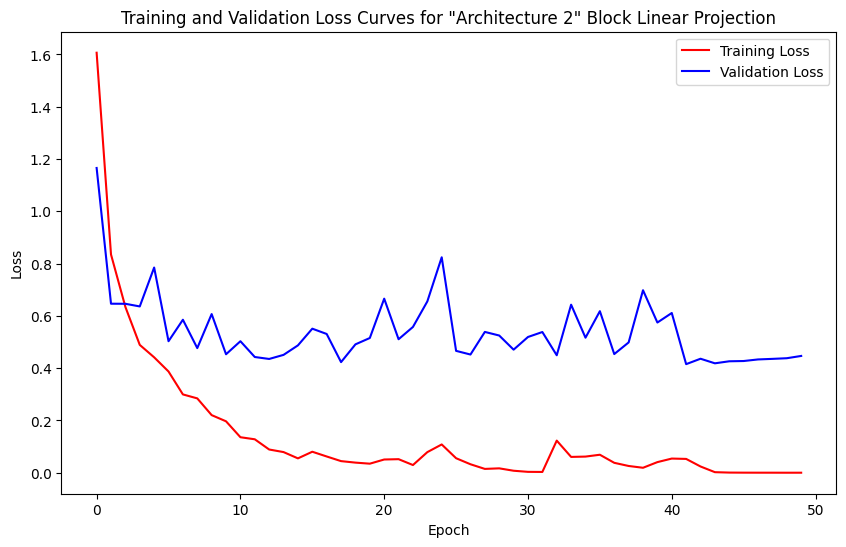

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training history from the CSV file
history_df = pd.read_csv("/content/training_history_4.csv")

# Extract the loss and validation loss values
train_loss = history_df['loss']
val_loss = history_df['val_loss']

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='red')
plt.plot(val_loss, label='Validation Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves for "Architecture 2" Block Linear Projection')
plt.legend()
plt.show()


In [ ]:
import os

# Directory where the saved models are located
models_directory = '/content/saved_models'

# Initialize variables to keep track of the best model and its accuracy
best_model_path = None
best_test_accuracy = 0.0

# Iterate through the files in the directory
for filename in os.listdir(models_directory):
    if filename.endswith('.h5'):
        # Load the model
        model_path = os.path.join(models_directory, filename)
        model = keras.models.load_model(model_path)

        # Evaluate the model on the test data
        test_loss, test_accuracy = model.evaluate(test_features, test_labels)

        # Check if this model has a higher test accuracy than the previous best
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_model_path = model_path

# Print the path of the best model and its test accuracy
print(f"Best Model Path: {best_model_path}")
print(f"Best Test Accuracy: {best_test_accuracy * 100:.2f}%")


11/11 [==============================] - 0s 3ms/step - loss: 0.3986 - sparse_categorical_accuracy: 0.8822
Best Model Path: /content/saved_models/model_49.h5
Best Test Accuracy: 91.24%


11/11 [==============================] - 1s 7ms/step - loss: 0.4248 - sparse_categorical_accuracy: 0.9124
Test accuracy: 91.24%
11/11 [==============================] - 0s 4ms/step


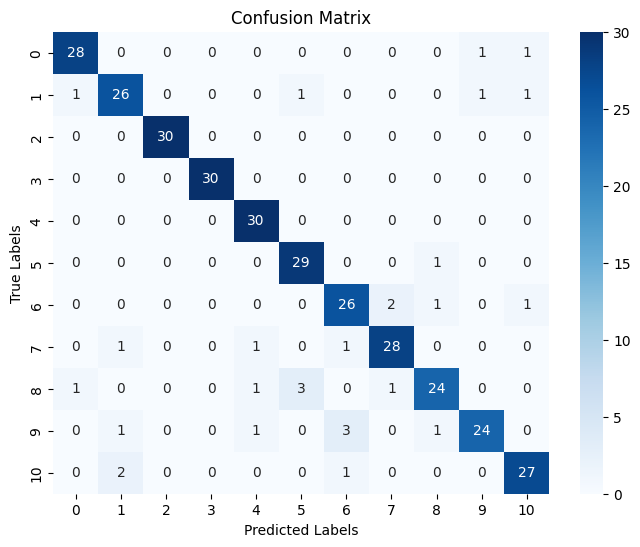

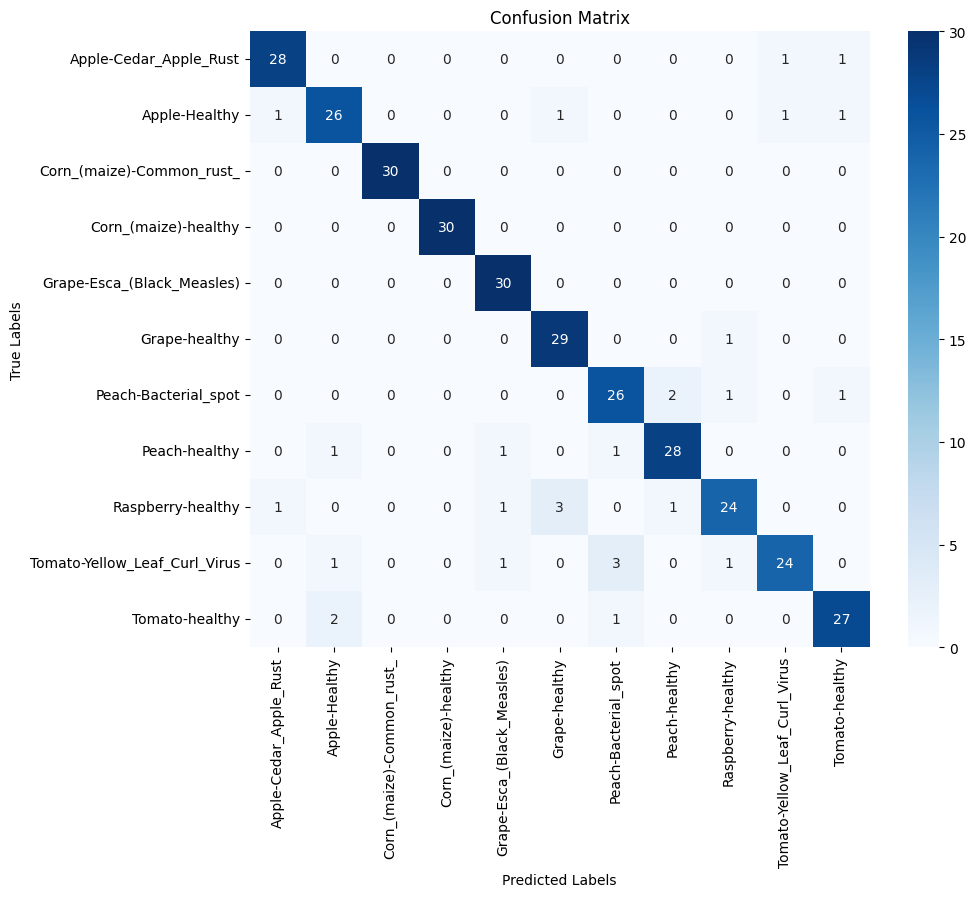

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the best model
best_model = keras.models.load_model("/content/saved_models/model_49.h5")

# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Make predictions on the test data
test_predictions = best_model.predict(test_features)
predicted_labels = np.argmax(test_predictions, axis=1)

# Create a confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

import joblib

# Load the label_encoder
loaded_label_encoder = joblib.load('/content/drive/MyDrive/ViT-Features/label_encoder.pkl')

# Get the class names from the label_encoder
class_names = loaded_label_encoder.classes_

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))  # You can adjust the figure size if needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, hamming_loss, precision_recall_fscore_support

# Calculate precision, recall, F1-score, and support for each class
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels, predicted_labels, average=None)

# Calculate micro-averaged precision, recall, F1-score
micro_precision, micro_recall, micro_f1_score, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='micro')

# Calculate macro-averaged precision, recall, F1-score
macro_precision, macro_recall, macro_f1_score, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='macro')

# Calculate Hamming loss
hamming_loss_value = hamming_loss(test_labels, predicted_labels)

# Print individual class metrics
for i, class_name in enumerate(class_names):
    print(f"Class: {class_name}")
    print(f"Precision: {precision[i]:.3f}")
    print(f"Recall: {recall[i]:.3f}")
    print(f"F1-score: {f1_score[i]:.3f}")
    print(f"Support: {support[i]}")
    print("\n")

# Print micro-averaged metrics
print("Micro-Averaged Metrics:")
print(f"Precision: {micro_precision:.2f}")
print(f"Recall: {micro_recall:.2f}")
print(f"F1-score: {micro_f1_score:.2f}")

# Print macro-averaged metrics
print("Macro-Averaged Metrics:")
print(f"Precision: {macro_precision:.3f}")
print(f"Recall: {macro_recall:.3f}")
print(f"F1-score: {macro_f1_score:.3f}")

# Print Hamming loss
print(f"Hamming Loss: {hamming_loss_value:.3f}")

Class: Apple-Cedar_Apple_Rust
Precision: 0.933
Recall: 0.933
F1-score: 0.933
Support: 30


Class: Apple-Healthy
Precision: 0.867
Recall: 0.867
F1-score: 0.867
Support: 30


Class: Corn_(maize)-Common_rust_
Precision: 1.000
Recall: 1.000
F1-score: 1.000
Support: 30


Class: Corn_(maize)-healthy
Precision: 1.000
Recall: 1.000
F1-score: 1.000
Support: 30


Class: Grape-Esca_(Black_Measles)
Precision: 0.909
Recall: 1.000
F1-score: 0.952
Support: 30


Class: Grape-healthy
Precision: 0.879
Recall: 0.967
F1-score: 0.921
Support: 30


Class: Peach-Bacterial_spot
Precision: 0.839
Recall: 0.867
F1-score: 0.852
Support: 30


Class: Peach-healthy
Precision: 0.903
Recall: 0.903
F1-score: 0.903
Support: 31


Class: Raspberry-healthy
Precision: 0.889
Recall: 0.800
F1-score: 0.842
Support: 30


Class: Tomato-Yellow_Leaf_Curl_Virus
Precision: 0.923
Recall: 0.800
F1-score: 0.857
Support: 30


Class: Tomato-healthy
Precision: 0.900
Recall: 0.900
F1-score: 0.900
Support: 30


Micro-Averaged Metrics:
Preci